<a href="https://colab.research.google.com/github/joanby/trading-algoritmico-dl/blob/main/ES_DL_Cap%C3%ADtulo_05_Redes_Neuronales_Profundas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img alt="Colaboratory logo" height="45px" src="https://www.quantreo.com/wp-content/uploads/2021/10/Original-on-Transparent.png" align="left" hspace="10px" vspace="0px">
<img alt="Colaboratory logo" height="45px" src="https://static-881c.kxcdn.com/wp-content/uploads/2016/03/frogamesLogoFull4.png" align="left" hspace="10px" vspace="0px"></p>

# Redes neuronales profundas (DNN or ANN)


<br>


💰 Únete a la comunidad de [Discord](https://discord.gg/wXjNPAc5BH)

📚 Puedes leer nuestro libro en [Amazon](https://www.amazon.com/gp/product/B09HG18CYL)

🖥️ El canal de [YouTube de Quantreo's](https://www.youtube.com/channel/UCp7jckfiEglNf_Gj62VR0pw) (en inglés) y el de [Frogames](https://www.youtube.com/channel/UCMUxXNYrVCv6-bQakhomvBg) en español

In [1]:
!pip install yfinance
!pip install ta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.4 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for ta: filename=ta-0.10.2-py3-none-any.whl size=29104 sha256=00262c8236be37ca0e0e660e5643800cfae47f92a063282cc52ff1eab606ee1f
  Stored in directory: /root/.cache/pip/wheels/31/31/f1/f2ff471bbc5b84a4b973698ceecdd453ae043971791adc3431
Successfully built ta


In [2]:
import numpy as np
import pandas as pd
import warnings
import yfinance as yf
import ta
warnings.filterwarnings("ignore")

In [3]:
# El código aquí nos permitirá cambiar los gráficos a modo oscuro para aquellos que elijan programar en modo oscuro
import matplotlib.pyplot as plt

import matplotlib as mpl
from matplotlib import cycler
colors = cycler('color',
                ['#669FEE', '#66EE91', '#9988DD',
                 '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('figure', facecolor='#313233')
plt.rc('axes', facecolor="#313233", edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors,
       labelcolor='gray')
plt.rc('grid', color='474A4A', linestyle='solid')
plt.rc('xtick', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('legend', facecolor="#313233", edgecolor="#313233")
plt.rc("text", color="#C9C9C9")

# Selección de características

In [4]:
def feature_engineering(df):
    """ Crear nuevas variables """
    
    # Copiamos el data frame para evitar interferencias entre las variables
    df_copy = df.copy()
    
    # Creamos la variable de retorno
    df_copy["returns"] = df_copy["close"].pct_change(1)

    # Creamos las SMAs
    df_copy["SMA 15"] = df_copy[["close"]].rolling(15).mean().shift(1)
    df_copy["SMA 60"] = df_copy[["close"]].rolling(60).mean().shift(1)
    
    # Creamos las volatilidades
    df_copy["MSD 10"] = df_copy[["returns"]].rolling(10).std().shift(1)
    df_copy["MSD 30"] = df_copy[["returns"]].rolling(30).std().shift(1)
    
    # Creamos el RSI
    RSI = ta.momentum.RSIIndicator(df_copy["close"], window= 14, fillna = False)
    df_copy["rsi"] = RSI.rsi().shift(1)
    
    return df_copy.dropna()

# Preparación de los datos

In [5]:
def preprocessing_yf(symbol):
  
  #Importar los datos
  df = yf.download(symbol).dropna()

  #Renombrar
  df.columns = ["open", "high", "low", "close", "adj close", "volume"]
  df.index.name = "time"

  #Eliminar la columna de cierre ajustado
  del df["adj close"]

  return df

In [6]:
df = preprocessing_yf("CADGBP=X")
dfc = feature_engineering(df)
dfc

[*********************100%***********************]  1 of 1 completed


,open,high,low,close,volume,returns,SMA 15,SMA 60,MSD 10,MSD 30,rsi
time,,,,,,,,,,,
2004-02-23,0.40198,0.40340,0.39909,0.40081,0,-0.002240,0.403553,0.422755,0.006902,0.006871,37.097347
2004-02-24,0.40061,0.40158,0.39743,0.39799,0,-0.007036,0.402908,0.422004,0.006034,0.006825,36.025416
2004-02-25,0.39811,0.40089,0.39614,0.39972,0,0.004347,0.402347,0.421211,0.006151,0.006837,32.824894
2004-02-26,0.39963,0.40186,0.39814,0.39909,0,-0.001576,0.401721,0.420454,0.006367,0.006905,36.549112
2004-02-27,0.39933,0.40188,0.39846,0.40047,0,0.003458,0.401199,0.419719,0.006332,0.006896,35.771345
...,...,...,...,...,...,...,...,...,...,...,...
2022-10-19,0.64224,0.64707,0.64100,0.64216,0,-0.000093,0.653843,0.652640,0.008123,0.010367,39.023553
2022-10-20,0.64773,0.65058,0.64513,0.64758,0,0.008440,0.651373,0.652588,0.008124,0.010345,38.980625
2022-10-21,0.64666,0.65275,0.64666,0.64676,0,-0.001266,0.649404,0.652691,0.008609,0.010479,44.877406


In [8]:
dfc.columns

Index(['open', 'high', 'low', 'close', 'volume', 'returns', 'SMA 15', 'SMA 60',
       'MSD 10', 'MSD 30', 'rsi'],
      dtype='object')

In [7]:
# Porcentaje del conjunto de entrenamiento
split = int(0.85*len(dfc))


# Creación del conjunto de entrenamiento
X_train = dfc[["SMA 15", "SMA 60", "MSD 10", "MSD 30", "rsi"]].iloc[:split,:]
y_train = dfc[["returns"]].iloc[:split,:]


# Creación del conjunto de testing
X_test = dfc[["SMA 15", "SMA 60", "MSD 10", "MSD 30", "rsi"]].iloc[split:,:]
y_test = dfc[["returns"]].iloc[split:,:]

y_train

,returns
time,
2004-02-23,-0.002240
2004-02-24,-0.007036
2004-02-25,0.004347
2004-02-26,-0.001576
2004-02-27,0.003458
...,...
2020-01-01,-0.007262
2020-01-02,0.003209
2020-01-03,0.006948


In [8]:
# Estandarización
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

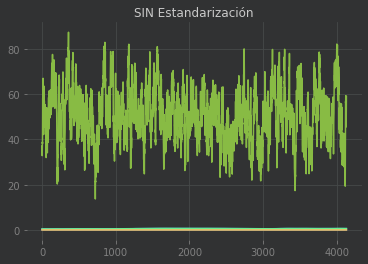

In [13]:
plt.plot(X_train.values)
plt.title("SIN Estandarización")
plt.show()

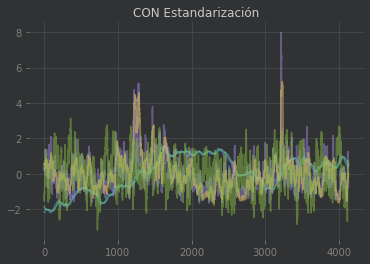

In [14]:
plt.plot(X_train_sc, alpha=0.5)
plt.title("CON Estandarización")
plt.show()

# DNN o ANN

In [17]:
# Librerías
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

nb_hidden_layer = 5


# Inicialización del modelo secuencial
regressor = Sequential()

# La primera de las capas
regressor.add(Dense(500, input_shape=(X_train_sc.shape[1],), activation="relu"))

# Añadimos las capas ocultas
for i in range(1,nb_hidden_layer):
  regressor.add(Dense(int(500/i), activation="relu"))


# La capa densa de salida
regressor.add(Dense(1, activation="linear"))

# Compilamos el modelo
regressor.compile(loss="mse", optimizer="adam")

# Iniciamos el entrenamiento
regressor.fit(X_train_sc, y_train, validation_data=(X_test_sc, y_test), epochs=1000)

Epoch 1/1000
130/130 [==============================] - 2s 12ms/step - loss: 1.8288e-04 - val_loss: 3.6014e-05
Epoch 2/1000
130/130 [==============================] - 1s 10ms/step - loss: 4.4257e-05 - val_loss: 3.7354e-05
Epoch 3/1000
130/130 [==============================] - 1s 10ms/step - loss: 4.3094e-05 - val_loss: 2.8800e-05
Epoch 4/1000
130/130 [==============================] - 1s 11ms/step - loss: 4.4775e-05 - val_loss: 2.7501e-05
Epoch 5/1000
130/130 [==============================] - 1s 10ms/step - loss: 4.1117e-05 - val_loss: 2.9512e-05
Epoch 6/1000
130/130 [==============================] - 1s 11ms/step - loss: 3.9182e-05 - val_loss: 3.0124e-05
Epoch 7/1000
130/130 [==============================] - 1s 10ms/step - loss: 4.0107e-05 - val_loss: 3.0386e-05
Epoch 8/1000
130/130 [==============================] - 1s 11ms/step - loss: 3.9323e-05 - val_loss: 2.6734e-05
Epoch 9/1000
130/130 [==============================] - 1s 10ms/step - loss: 3.8344e-05 - val_loss: 2.8119e-05
E

KeyboardInterrupt: ignored

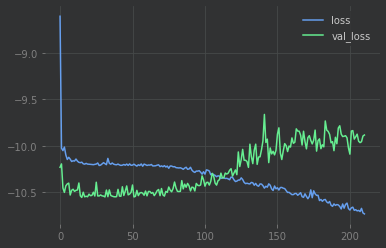

In [18]:
np.log(pd.DataFrame(regressor.history.history)).plot()

In [19]:
from tensorflow.keras.callbacks import EarlyStopping

# Librerías
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

nb_hidden_layer = 2


# Inicialización del modelo secuencial
regressor = Sequential()

# La primera capa
regressor.add(Dense(25, input_shape=(X_train_sc.shape[1],), activation="relu"))

# Aadimos las capas ocultas
for i in range(1,nb_hidden_layer):
  regressor.add(Dense(int(25/i), activation="relu"))


# La capa densa de salida
regressor.add(Dense(1, activation="linear"))

# Compilamos el modelo
regressor.compile(loss="mse", optimizer="adam")

early_stop = EarlyStopping(verbose=1, patience = 5)

regressor.fit(X_train_sc, y_train, validation_data=(X_test_sc, y_test), epochs=100, callbacks=[early_stop])

Epoch 1/100
130/130 [==============================] - 1s 4ms/step - loss: 0.0185 - val_loss: 0.0016
Epoch 2/100
130/130 [==============================] - 0s 3ms/step - loss: 0.0014 - val_loss: 8.9113e-04
Epoch 3/100
130/130 [==============================] - 0s 3ms/step - loss: 7.7333e-04 - val_loss: 6.5162e-04
Epoch 4/100
130/130 [==============================] - 0s 3ms/step - loss: 5.5454e-04 - val_loss: 5.6508e-04
Epoch 5/100
130/130 [==============================] - 0s 3ms/step - loss: 4.0323e-04 - val_loss: 4.2965e-04
Epoch 6/100
130/130 [==============================] - 0s 3ms/step - loss: 3.2494e-04 - val_loss: 3.9516e-04
Epoch 7/100
130/130 [==============================] - 0s 3ms/step - loss: 2.7769e-04 - val_loss: 4.1985e-04
Epoch 8/100
130/130 [==============================] - 0s 3ms/step - loss: 2.3280e-04 - val_loss: 3.5147e-04
Epoch 9/100
130/130 [==============================] - 0s 3ms/step - loss: 2.0528e-04 - val_loss: 3.0378e-04
Epoch 10/100
130/130 [=========

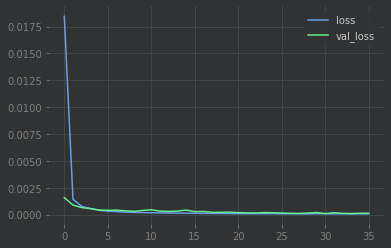

In [20]:
pd.DataFrame(regressor.history.history).plot()

In [21]:
# Creamos predicciones para el dataset al completo
dfc["prediction"] = regressor.predict(np.concatenate((X_train_sc,X_test_sc),
                                    axis=0))

# Calculamos la estrategia
dfc["strategy"] = dfc["returns"] * np.sign(dfc["prediction"].shift(1))

152/152 [==============================] - 0s 2ms/step


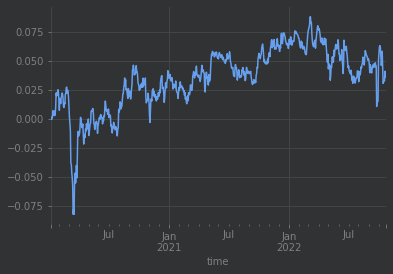

In [24]:
dfc["strategy"].iloc[split:].cumsum().plot()

# Automatización

In [9]:
def feature_engineering(df):
    """ Creamos nuevas variables"""
    
    # We copy the dataframe to avoid interferences in the data
    df_copy = df.copy()
    
    # Create the returns
    df_copy["returns"] = df_copy["close"].pct_change(1)

    # Create the SMAs
    df_copy["SMA 15"] = df_copy[["close"]].rolling(15).mean().shift(1)
    df_copy["SMA 60"] = df_copy[["close"]].rolling(60).mean().shift(1)
    
    # Create the volatilities
    df_copy["MSD 10"] = df_copy[["returns"]].rolling(10).std().shift(1)
    df_copy["MSD 30"] = df_copy[["returns"]].rolling(30).std().shift(1)
    
    # Create the Rsi
    RSI = ta.momentum.RSIIndicator(df_copy["close"], window= 14, fillna = False)
    df_copy["rsi"] = RSI.rsi().shift(1)
    
    return df_copy.dropna()

def preprocessing_yf(symbol):
  
  #Import the data
  df = yf.download(symbol).dropna()

  #Rename
  df.columns = ["open", "high", "low", "close", "adj close", "volume"]
  df.index.name = "time"

  # Remove adj close
  del df["adj close"]

  return df

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

def ANN(symbol, nb_neurons=25, nb_hidden_layer=2, nb_model=None):

  # Features engineering
  df = preprocessing_yf(symbol)
  dfc = feature_engineering(df)

  # Percentage train set
  split = int(0.85*len(dfc))
  split_val = int(0.95*len(dfc))

  # Train set creation
  X_train = dfc[['SMA 15', 'SMA 60',
        'MSD 10', 'MSD 30', 'rsi']].iloc[:split,:]
  y_train = dfc[["returns"]].iloc[:split]


  # Test set creation
  X_test = dfc[['SMA 15', 'SMA 60',
        'MSD 10', 'MSD 30', 'rsi']].iloc[split:,:]
  y_test = dfc[["returns"]].iloc[split:]
  

  # STANDARDISATION
  from sklearn.preprocessing import StandardScaler

  sc = StandardScaler()

  X_train_sc = sc.fit_transform(X_train)
  X_test_sc = sc.transform(X_test)


  # INTIALIZATION SEQUENTIAL MODEL
  regressor = Sequential()

  # FIRST LAYER
  regressor.add(Dense(nb_neurons, input_shape=(X_train_sc.shape[1],), activation="relu"))

  # ADD HIDDEN LAYER
  for i in range(1,nb_hidden_layer):
    regressor.add(Dense(int(nb_neurons/i), activation="relu"))


  # OUTPUT LAYER DENSE
  regressor.add(Dense(1, activation="linear"))

  # COMPILE THE MODEL
  regressor.compile(loss="mse", optimizer="adam")

  early_stop = EarlyStopping(verbose=1, patience = 5)

  regressor.fit(X_train_sc, y_train, validation_data=(X_test_sc, y_test), epochs=100, callbacks=[early_stop])

  # Create predictions for the whole dataset
  dfc["prediction"] = regressor.predict(np.concatenate((X_train_sc,X_test_sc),
                                      axis=0))

  # Compute the strategy
  dfc["strategy"] = np.sign(dfc["prediction"].shift(1)) * dfc["returns"]

  dfc["return"] = dfc["strategy"]

  if nb_model!=None:
    regressor.save_weights(f"Weights_ANN/ANN n°{nb_model}")
    return dfc["strategy"].iloc[split:split_val], dfc["strategy"].iloc[split_val:]

  else:
      return dfc["strategy"].iloc[split:split_val], dfc["strategy"].iloc[split_val:]



In [10]:
sr = ANN("CADGBP=X", nb_model=15)

sr

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
130/130 [==============================] - 1s 4ms/step - loss: 0.0147 - val_loss: 7.7910e-04
Epoch 2/100
130/130 [==============================] - 0s 2ms/step - loss: 8.5064e-04 - val_loss: 4.3519e-04
Epoch 3/100
130/130 [==============================] - 0s 3ms/step - loss: 4.2911e-04 - val_loss: 3.3347e-04
Epoch 4/100
130/130 [==============================] - 0s 2ms/step - loss: 3.0050e-04 - val_loss: 2.3497e-04
Epoch 5/100
130/130 [==============================] - 0s 2ms/step - loss: 2.4028e-04 - val_loss: 2.5629e-04
Epoch 6/100
130/130 [==============================] - 0s 3ms/step - loss: 2.0690e-04 - val_loss: 2.0165e-04
Epoch 7/100
130/130 [==============================] - 0s 2ms/step - loss: 1.8045e-04 - val_loss: 1.6441e-04
Epoch 8/100
130/130 [==============================] - 0s 2ms/step - loss: 1.6467e-04 - val_loss: 1.6047e-04
Epoch 9/100
130/130 [==============================] - 0s 2ms/s

(time
 2020-01-08   -0.001503
 2020-01-09   -0.001893
 2020-01-10    0.000683
 2020-01-13    0.001673
 2020-01-14    0.005131
                 ...   
 2021-11-11    0.006932
 2021-11-12   -0.004657
 2021-11-15   -0.000353
 2021-11-16    0.003098
 2021-11-17   -0.005807
 Name: strategy, Length: 486, dtype: float64, time
 2021-11-18   -0.008272
 2021-11-19    0.000272
 2021-11-22    0.000868
 2021-11-23   -0.001037
 2021-11-24   -0.003472
                 ...   
 2022-10-19   -0.000093
 2022-10-20    0.008440
 2022-10-21   -0.001266
 2022-10-24   -0.001314
 2022-10-25    0.000604
 Name: strategy, Length: 244, dtype: float64)

In [11]:
# Library to estimate the time until the end of the loop
from tqdm import tqdm

# Empty lists to contain the returns
returns_test = []
returns_val = []


# Compute the returns during the test and validation periods
for i in tqdm(range(100)):
  test, val = ANN("CADGBP=X", nb_model=i)
  returns_test.append(test)
  returns_val.append(val)

  0%|          | 0/100 [00:00<?, ?it/s]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
130/130 [==============================] - 1s 3ms/step - loss: 0.0236 - val_loss: 0.0021
Epoch 2/100
130/130 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 9.5763e-04
Epoch 3/100
130/130 [==============================] - 0s 2ms/step - loss: 8.4663e-04 - val_loss: 6.0494e-04
Epoch 4/100
130/130 [==============================] - 0s 2ms/step - loss: 5.5895e-04 - val_loss: 3.7117e-04
Epoch 5/100
130/130 [==============================] - 0s 2ms/step - loss: 4.3858e-04 - val_loss: 3.0138e-04
Epoch 6/100
130/130 [==============================] - 0s 2ms/step - loss: 3.3987e-04 - val_loss: 2.8957e-04
Epoch 7/100
130/130 [==============================] - 0s 2ms/step - loss: 2.9302e-04 - val_loss: 2.5285e-04
Epoch 8/100
130/130 [==============================] - 0s 2ms/step - loss: 2.4587e-04 - val_loss: 2.4132e-04
Epoch 9/100
130/130 [==============================] - 0s 2ms/step - lo

  1%|          | 1/100 [00:11<18:45, 11.37s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
130/130 [==============================] - 1s 6ms/step - loss: 0.0081 - val_loss: 0.0011
Epoch 2/100
130/130 [==============================] - 1s 5ms/step - loss: 8.5169e-04 - val_loss: 3.9404e-04
Epoch 3/100
130/130 [==============================] - 1s 6ms/step - loss: 4.7472e-04 - val_loss: 3.1857e-04
Epoch 4/100
130/130 [==============================] - 1s 4ms/step - loss: 3.4059e-04 - val_loss: 2.2977e-04
Epoch 5/100
130/130 [==============================] - 1s 7ms/step - loss: 2.7423e-04 - val_loss: 1.7560e-04
Epoch 6/100
130/130 [==============================] - 0s 4ms/step - loss: 2.2953e-04 - val_loss: 1.5404e-04
Epoch 7/100
130/130 [==============================] - 1s 6ms/step - loss: 2.0359e-04 - val_loss: 1.3933e-04
Epoch 8/100
130/130 [==============================] - 1s 4ms/step - loss: 1.8737e-04 - val_loss: 1.4204e-04
Epoch 9/100
130/130 [==============================] - 1s 5ms/step 

  2%|▏         | 2/100 [00:32<28:21, 17.37s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
130/130 [==============================] - 1s 3ms/step - loss: 0.0193 - val_loss: 0.0024
Epoch 2/100
130/130 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 3/100
130/130 [==============================] - 0s 2ms/step - loss: 8.6792e-04 - val_loss: 8.7421e-04
Epoch 4/100
130/130 [==============================] - 0s 2ms/step - loss: 6.1641e-04 - val_loss: 5.0401e-04
Epoch 5/100
130/130 [==============================] - 0s 2ms/step - loss: 4.8252e-04 - val_loss: 5.5221e-04
Epoch 6/100
130/130 [==============================] - 0s 3ms/step - loss: 3.9315e-04 - val_loss: 4.1164e-04
Epoch 7/100
130/130 [==============================] - 0s 2ms/step - loss: 3.2420e-04 - val_loss: 3.4284e-04
Epoch 8/100
130/130 [==============================] - 0s 2ms/step - loss: 2.7283e-04 - val_loss: 2.9213e-04
Epoch 9/100
130/130 [==============================] - 0s 2ms/step - loss: 

  3%|▎         | 3/100 [00:42<22:13, 13.74s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
130/130 [==============================] - 1s 3ms/step - loss: 0.0053 - val_loss: 0.0015
Epoch 2/100
130/130 [==============================] - 0s 3ms/step - loss: 7.7386e-04 - val_loss: 5.5733e-04
Epoch 3/100
130/130 [==============================] - 0s 2ms/step - loss: 4.2008e-04 - val_loss: 4.3391e-04
Epoch 4/100
130/130 [==============================] - 0s 2ms/step - loss: 2.9166e-04 - val_loss: 2.7293e-04
Epoch 5/100
130/130 [==============================] - 0s 2ms/step - loss: 2.2374e-04 - val_loss: 2.2314e-04
Epoch 6/100
130/130 [==============================] - 0s 2ms/step - loss: 1.8448e-04 - val_loss: 2.3615e-04
Epoch 7/100
130/130 [==============================] - 0s 2ms/step - loss: 1.5721e-04 - val_loss: 2.0324e-04
Epoch 8/100
130/130 [==============================] - 0s 2ms/step - loss: 1.3760e-04 - val_loss: 1.5274e-04
Epoch 9/100
130/130 [==============================] - 0s 2ms/step 

  4%|▍         | 4/100 [01:03<26:53, 16.80s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
130/130 [==============================] - 1s 3ms/step - loss: 0.0115 - val_loss: 0.0021
Epoch 2/100
130/130 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 3/100
130/130 [==============================] - 0s 2ms/step - loss: 6.5467e-04 - val_loss: 8.1474e-04
Epoch 4/100
130/130 [==============================] - 0s 2ms/step - loss: 4.6486e-04 - val_loss: 7.8981e-04
Epoch 5/100
130/130 [==============================] - 0s 3ms/step - loss: 3.6009e-04 - val_loss: 6.5159e-04
Epoch 6/100
130/130 [==============================] - 0s 2ms/step - loss: 2.8887e-04 - val_loss: 5.0685e-04
Epoch 7/100
130/130 [==============================] - 0s 2ms/step - loss: 2.3548e-04 - val_loss: 4.6693e-04
Epoch 8/100
130/130 [==============================] - 0s 2ms/step - loss: 2.1491e-04 - val_loss: 4.0130e-04
Epoch 9/100
130/130 [==============================] - 0s 2ms/step - loss: 

  5%|▌         | 5/100 [01:20<26:37, 16.82s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
130/130 [==============================] - 1s 3ms/step - loss: 0.0044 - val_loss: 7.8311e-04
Epoch 2/100
130/130 [==============================] - 0s 2ms/step - loss: 4.9907e-04 - val_loss: 5.6110e-04
Epoch 3/100
130/130 [==============================] - 0s 2ms/step - loss: 3.1765e-04 - val_loss: 4.1200e-04
Epoch 4/100
130/130 [==============================] - 0s 2ms/step - loss: 2.2853e-04 - val_loss: 3.7710e-04
Epoch 5/100
130/130 [==============================] - 0s 2ms/step - loss: 1.7476e-04 - val_loss: 2.4635e-04
Epoch 6/100
130/130 [==============================] - 0s 2ms/step - loss: 1.4415e-04 - val_loss: 2.1978e-04
Epoch 7/100
130/130 [==============================] - 0s 2ms/step - loss: 1.2625e-04 - val_loss: 2.0111e-04
Epoch 8/100
130/130 [==============================] - 0s 2ms/step - loss: 1.1052e-04 - val_loss: 1.8916e-04
Epoch 9/100
130/130 [==============================] - 0s 2ms/s

  6%|▌         | 6/100 [01:30<22:28, 14.35s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
130/130 [==============================] - 1s 3ms/step - loss: 0.0069 - val_loss: 0.0011
Epoch 2/100
130/130 [==============================] - 0s 2ms/step - loss: 6.6756e-04 - val_loss: 3.9881e-04
Epoch 3/100
130/130 [==============================] - 0s 2ms/step - loss: 3.1130e-04 - val_loss: 2.6605e-04
Epoch 4/100
130/130 [==============================] - 0s 2ms/step - loss: 2.1357e-04 - val_loss: 2.5008e-04
Epoch 5/100
130/130 [==============================] - 0s 2ms/step - loss: 1.7646e-04 - val_loss: 2.1774e-04
Epoch 6/100
130/130 [==============================] - 0s 2ms/step - loss: 1.4553e-04 - val_loss: 1.9492e-04
Epoch 7/100
130/130 [==============================] - 0s 2ms/step - loss: 1.3224e-04 - val_loss: 2.0863e-04
Epoch 8/100
130/130 [==============================] - 0s 2ms/step - loss: 1.1245e-04 - val_loss: 1.8593e-04
Epoch 9/100
130/130 [==============================] - 0s 2ms/step 

  7%|▋         | 7/100 [01:41<20:40, 13.34s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
130/130 [==============================] - 1s 3ms/step - loss: 0.0134 - val_loss: 0.0019
Epoch 2/100
130/130 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 3/100
130/130 [==============================] - 0s 2ms/step - loss: 5.8910e-04 - val_loss: 7.4881e-04
Epoch 4/100
130/130 [==============================] - 0s 2ms/step - loss: 4.2063e-04 - val_loss: 6.1320e-04
Epoch 5/100
130/130 [==============================] - 0s 2ms/step - loss: 3.2202e-04 - val_loss: 6.2892e-04
Epoch 6/100
130/130 [==============================] - 0s 2ms/step - loss: 2.6332e-04 - val_loss: 4.3410e-04
Epoch 7/100
130/130 [==============================] - 0s 2ms/step - loss: 2.1941e-04 - val_loss: 4.0221e-04
Epoch 8/100
130/130 [==============================] - 0s 2ms/step - loss: 1.8887e-04 - val_loss: 3.2444e-04
Epoch 9/100
130/130 [==============================] - 0s 2ms/step - loss: 

  8%|▊         | 8/100 [01:51<18:51, 12.30s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
130/130 [==============================] - 1s 3ms/step - loss: 0.0073 - val_loss: 4.8630e-04
Epoch 2/100
130/130 [==============================] - 0s 2ms/step - loss: 5.8115e-04 - val_loss: 2.4361e-04
Epoch 3/100
130/130 [==============================] - 0s 2ms/step - loss: 3.1479e-04 - val_loss: 1.8149e-04
Epoch 4/100
130/130 [==============================] - 0s 3ms/step - loss: 2.1556e-04 - val_loss: 1.4596e-04
Epoch 5/100
130/130 [==============================] - 0s 2ms/step - loss: 1.6552e-04 - val_loss: 1.2130e-04
Epoch 6/100
130/130 [==============================] - 0s 2ms/step - loss: 1.3149e-04 - val_loss: 1.0845e-04
Epoch 7/100
130/130 [==============================] - 0s 3ms/step - loss: 1.1241e-04 - val_loss: 9.5008e-05
Epoch 8/100
130/130 [==============================] - 0s 2ms/step - loss: 9.9364e-05 - val_loss: 8.5484e-05
Epoch 9/100
130/130 [==============================] - 0s 2ms/s

  9%|▉         | 9/100 [02:02<17:47, 11.73s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
130/130 [==============================] - 1s 3ms/step - loss: 0.0047 - val_loss: 0.0019
Epoch 2/100
130/130 [==============================] - 0s 2ms/step - loss: 6.7489e-04 - val_loss: 8.3593e-04
Epoch 3/100
130/130 [==============================] - 0s 2ms/step - loss: 3.5597e-04 - val_loss: 4.8540e-04
Epoch 4/100
130/130 [==============================] - 0s 3ms/step - loss: 2.4492e-04 - val_loss: 3.1871e-04
Epoch 5/100
130/130 [==============================] - 0s 3ms/step - loss: 1.9073e-04 - val_loss: 2.6480e-04
Epoch 6/100
130/130 [==============================] - 0s 2ms/step - loss: 1.6654e-04 - val_loss: 2.2519e-04
Epoch 7/100
130/130 [==============================] - 0s 2ms/step - loss: 1.4393e-04 - val_loss: 2.2974e-04
Epoch 8/100
130/130 [==============================] - 1s 4ms/step - loss: 1.2636e-04 - val_loss: 2.1890e-04
Epoch 9/100
130/130 [==============================] - 0s 2ms/step 

 10%|█         | 10/100 [02:20<20:45, 13.84s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
130/130 [==============================] - 1s 3ms/step - loss: 0.0096 - val_loss: 0.0019
Epoch 2/100
130/130 [==============================] - 0s 2ms/step - loss: 8.1900e-04 - val_loss: 8.8933e-04
Epoch 3/100
130/130 [==============================] - 0s 2ms/step - loss: 4.2383e-04 - val_loss: 4.3127e-04
Epoch 4/100
130/130 [==============================] - 0s 3ms/step - loss: 3.0134e-04 - val_loss: 2.9951e-04
Epoch 5/100
130/130 [==============================] - 0s 2ms/step - loss: 2.3783e-04 - val_loss: 2.3613e-04
Epoch 6/100
130/130 [==============================] - 0s 2ms/step - loss: 2.0517e-04 - val_loss: 1.7971e-04
Epoch 7/100
130/130 [==============================] - 0s 2ms/step - loss: 1.7373e-04 - val_loss: 1.8933e-04
Epoch 8/100
130/130 [==============================] - 0s 2ms/step - loss: 1.5779e-04 - val_loss: 1.7581e-04
Epoch 9/100
130/130 [==============================] - 0s 2ms/step 

 11%|█         | 11/100 [02:30<18:48, 12.68s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
130/130 [==============================] - 1s 3ms/step - loss: 0.0046 - val_loss: 8.7783e-04
Epoch 2/100
130/130 [==============================] - 0s 2ms/step - loss: 8.0545e-04 - val_loss: 5.4343e-04
Epoch 3/100
130/130 [==============================] - 0s 2ms/step - loss: 4.8644e-04 - val_loss: 5.0982e-04
Epoch 4/100
130/130 [==============================] - 0s 2ms/step - loss: 3.4037e-04 - val_loss: 2.5739e-04
Epoch 5/100
130/130 [==============================] - 0s 2ms/step - loss: 2.4893e-04 - val_loss: 2.4223e-04
Epoch 6/100
130/130 [==============================] - 0s 2ms/step - loss: 2.1121e-04 - val_loss: 2.3055e-04
Epoch 7/100
130/130 [==============================] - 0s 2ms/step - loss: 1.7503e-04 - val_loss: 2.0797e-04
Epoch 8/100
130/130 [==============================] - 0s 2ms/step - loss: 1.6496e-04 - val_loss: 1.9255e-04
Epoch 9/100
130/130 [==============================] - 0s 2ms/s

 12%|█▏        | 12/100 [02:41<17:38, 12.02s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
130/130 [==============================] - 1s 3ms/step - loss: 0.0102 - val_loss: 0.0013
Epoch 2/100
130/130 [==============================] - 0s 2ms/step - loss: 8.8373e-04 - val_loss: 6.8919e-04
Epoch 3/100
130/130 [==============================] - 0s 2ms/step - loss: 5.0656e-04 - val_loss: 5.9687e-04
Epoch 4/100
130/130 [==============================] - 0s 2ms/step - loss: 3.5658e-04 - val_loss: 4.9183e-04
Epoch 5/100
130/130 [==============================] - 0s 2ms/step - loss: 2.8601e-04 - val_loss: 3.1541e-04
Epoch 6/100
130/130 [==============================] - 0s 2ms/step - loss: 2.3953e-04 - val_loss: 3.5845e-04
Epoch 7/100
130/130 [==============================] - 0s 2ms/step - loss: 2.0481e-04 - val_loss: 2.7981e-04
Epoch 8/100
130/130 [==============================] - 0s 2ms/step - loss: 1.8045e-04 - val_loss: 2.3653e-04
Epoch 9/100
130/130 [==============================] - 0s 2ms/step 

 13%|█▎        | 13/100 [03:02<21:35, 14.89s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
130/130 [==============================] - 1s 3ms/step - loss: 0.0568 - val_loss: 0.0045
Epoch 2/100
130/130 [==============================] - 0s 2ms/step - loss: 0.0032 - val_loss: 0.0013
Epoch 3/100
130/130 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0010
Epoch 4/100
130/130 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 7.7332e-04
Epoch 5/100
130/130 [==============================] - 0s 2ms/step - loss: 8.5571e-04 - val_loss: 6.4112e-04
Epoch 6/100
130/130 [==============================] - 0s 2ms/step - loss: 6.8773e-04 - val_loss: 4.8391e-04
Epoch 7/100
130/130 [==============================] - 0s 2ms/step - loss: 5.6083e-04 - val_loss: 4.0857e-04
Epoch 8/100
130/130 [==============================] - 0s 2ms/step - loss: 4.7178e-04 - val_loss: 3.5298e-04
Epoch 9/100
130/130 [==============================] - 0s 2ms/step - loss: 3.9521e-04 -

 14%|█▍        | 14/100 [03:23<23:56, 16.70s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
130/130 [==============================] - 1s 3ms/step - loss: 0.0089 - val_loss: 0.0012
Epoch 2/100
130/130 [==============================] - 0s 2ms/step - loss: 6.9664e-04 - val_loss: 4.6718e-04
Epoch 3/100
130/130 [==============================] - 0s 2ms/step - loss: 3.7240e-04 - val_loss: 2.7715e-04
Epoch 4/100
130/130 [==============================] - 0s 2ms/step - loss: 2.6150e-04 - val_loss: 2.1965e-04
Epoch 5/100
130/130 [==============================] - 0s 2ms/step - loss: 2.0412e-04 - val_loss: 2.1184e-04
Epoch 6/100
130/130 [==============================] - 0s 2ms/step - loss: 1.7382e-04 - val_loss: 1.5812e-04
Epoch 7/100
130/130 [==============================] - 0s 2ms/step - loss: 1.5373e-04 - val_loss: 1.5195e-04
Epoch 8/100
130/130 [==============================] - 0s 2ms/step - loss: 1.4109e-04 - val_loss: 1.3000e-04
Epoch 9/100
130/130 [==============================] - 0s 2ms/step 

 15%|█▌        | 15/100 [03:34<21:20, 15.07s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
130/130 [==============================] - 1s 3ms/step - loss: 0.0024 - val_loss: 3.8673e-04
Epoch 2/100
130/130 [==============================] - 0s 2ms/step - loss: 3.3782e-04 - val_loss: 2.1627e-04
Epoch 3/100
130/130 [==============================] - 0s 2ms/step - loss: 2.1924e-04 - val_loss: 1.8224e-04
Epoch 4/100
130/130 [==============================] - 0s 2ms/step - loss: 1.8149e-04 - val_loss: 1.6543e-04
Epoch 5/100
130/130 [==============================] - 0s 2ms/step - loss: 1.5129e-04 - val_loss: 1.3117e-04
Epoch 6/100
130/130 [==============================] - 0s 2ms/step - loss: 1.3055e-04 - val_loss: 1.1406e-04
Epoch 7/100
130/130 [==============================] - 0s 2ms/step - loss: 1.2248e-04 - val_loss: 1.2784e-04
Epoch 8/100
130/130 [==============================] - 0s 2ms/step - loss: 1.1569e-04 - val_loss: 1.1776e-04
Epoch 9/100
130/130 [==============================] - 0s 3ms/s

 16%|█▌        | 16/100 [03:45<19:10, 13.69s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
130/130 [==============================] - 1s 3ms/step - loss: 0.0158 - val_loss: 0.0012
Epoch 2/100
130/130 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 7.1205e-04
Epoch 3/100
130/130 [==============================] - 0s 2ms/step - loss: 7.2115e-04 - val_loss: 5.3678e-04
Epoch 4/100
130/130 [==============================] - 0s 2ms/step - loss: 5.2275e-04 - val_loss: 4.4744e-04
Epoch 5/100
130/130 [==============================] - 0s 2ms/step - loss: 4.1385e-04 - val_loss: 3.5584e-04
Epoch 6/100
130/130 [==============================] - 0s 2ms/step - loss: 3.2784e-04 - val_loss: 2.7172e-04
Epoch 7/100
130/130 [==============================] - 0s 2ms/step - loss: 2.8865e-04 - val_loss: 2.4336e-04
Epoch 8/100
130/130 [==============================] - 0s 3ms/step - loss: 2.5069e-04 - val_loss: 2.1769e-04
Epoch 9/100
130/130 [==============================] - 0s 2ms/step - lo

 17%|█▋        | 17/100 [04:06<22:10, 16.03s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
130/130 [==============================] - 1s 3ms/step - loss: 0.0057 - val_loss: 7.2463e-04
Epoch 2/100
130/130 [==============================] - 0s 2ms/step - loss: 6.6185e-04 - val_loss: 5.3232e-04
Epoch 3/100
130/130 [==============================] - 0s 2ms/step - loss: 3.9687e-04 - val_loss: 4.8395e-04
Epoch 4/100
130/130 [==============================] - 0s 2ms/step - loss: 2.9621e-04 - val_loss: 4.0621e-04
Epoch 5/100
130/130 [==============================] - 0s 3ms/step - loss: 2.3663e-04 - val_loss: 3.1227e-04
Epoch 6/100
130/130 [==============================] - 0s 3ms/step - loss: 1.9660e-04 - val_loss: 2.9275e-04
Epoch 7/100
130/130 [==============================] - 0s 2ms/step - loss: 1.7233e-04 - val_loss: 2.6329e-04
Epoch 8/100
130/130 [==============================] - 0s 2ms/step - loss: 1.4896e-04 - val_loss: 3.3311e-04
Epoch 9/100
130/130 [==============================] - 0s 2ms/s

 18%|█▊        | 18/100 [04:28<24:09, 17.68s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
130/130 [==============================] - 1s 3ms/step - loss: 0.0252 - val_loss: 0.0013
Epoch 2/100
130/130 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0011
Epoch 3/100
130/130 [==============================] - 0s 3ms/step - loss: 6.6044e-04 - val_loss: 6.3487e-04
Epoch 4/100
130/130 [==============================] - 0s 3ms/step - loss: 4.5123e-04 - val_loss: 5.0002e-04
Epoch 5/100
130/130 [==============================] - 0s 3ms/step - loss: 3.4993e-04 - val_loss: 4.4807e-04
Epoch 6/100
130/130 [==============================] - 0s 2ms/step - loss: 2.8536e-04 - val_loss: 3.9775e-04
Epoch 7/100
130/130 [==============================] - 0s 3ms/step - loss: 2.5613e-04 - val_loss: 3.5804e-04
Epoch 8/100
130/130 [==============================] - 0s 2ms/step - loss: 2.2203e-04 - val_loss: 3.1045e-04
Epoch 9/100
130/130 [==============================] - 0s 2ms/step - loss: 

 19%|█▉        | 19/100 [04:49<25:24, 18.82s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
130/130 [==============================] - 1s 3ms/step - loss: 0.0162 - val_loss: 9.9383e-04
Epoch 2/100
130/130 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 6.9979e-04
Epoch 3/100
130/130 [==============================] - 0s 2ms/step - loss: 6.8187e-04 - val_loss: 5.9743e-04
Epoch 4/100
130/130 [==============================] - 0s 2ms/step - loss: 5.0931e-04 - val_loss: 4.3820e-04
Epoch 5/100
130/130 [==============================] - 0s 2ms/step - loss: 4.0472e-04 - val_loss: 4.0662e-04
Epoch 6/100
130/130 [==============================] - 0s 2ms/step - loss: 3.3952e-04 - val_loss: 3.6227e-04
Epoch 7/100
130/130 [==============================] - 0s 2ms/step - loss: 2.8700e-04 - val_loss: 3.1165e-04
Epoch 8/100
130/130 [==============================] - 0s 2ms/step - loss: 2.4642e-04 - val_loss: 3.0690e-04
Epoch 9/100
130/130 [==============================] - 0s 2ms/step 

 20%|██        | 20/100 [05:14<27:36, 20.70s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
130/130 [==============================] - 1s 3ms/step - loss: 0.0372 - val_loss: 0.0026
Epoch 2/100
130/130 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0013
Epoch 3/100
130/130 [==============================] - 0s 3ms/step - loss: 7.7815e-04 - val_loss: 7.4338e-04
Epoch 4/100
130/130 [==============================] - 0s 3ms/step - loss: 5.1277e-04 - val_loss: 5.1249e-04
Epoch 5/100
130/130 [==============================] - 0s 2ms/step - loss: 3.9469e-04 - val_loss: 4.2391e-04
Epoch 6/100
130/130 [==============================] - 0s 3ms/step - loss: 3.2385e-04 - val_loss: 3.0557e-04
Epoch 7/100
130/130 [==============================] - 0s 2ms/step - loss: 2.7629e-04 - val_loss: 2.5332e-04
Epoch 8/100
130/130 [==============================] - 0s 2ms/step - loss: 2.4217e-04 - val_loss: 2.2987e-04
Epoch 9/100
130/130 [==============================] - 0s 2ms/step - loss: 

 21%|██        | 21/100 [05:36<27:35, 20.95s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
130/130 [==============================] - 1s 3ms/step - loss: 0.0155 - val_loss: 0.0013
Epoch 2/100
130/130 [==============================] - 0s 3ms/step - loss: 9.7240e-04 - val_loss: 6.9482e-04
Epoch 3/100
130/130 [==============================] - 0s 2ms/step - loss: 4.6748e-04 - val_loss: 4.6454e-04
Epoch 4/100
130/130 [==============================] - 0s 3ms/step - loss: 3.1933e-04 - val_loss: 3.4007e-04
Epoch 5/100
130/130 [==============================] - 0s 2ms/step - loss: 2.5652e-04 - val_loss: 2.9739e-04
Epoch 6/100
130/130 [==============================] - 0s 2ms/step - loss: 2.2175e-04 - val_loss: 2.3526e-04
Epoch 7/100
130/130 [==============================] - 0s 3ms/step - loss: 1.9346e-04 - val_loss: 2.1333e-04
Epoch 8/100
130/130 [==============================] - 0s 2ms/step - loss: 1.7217e-04 - val_loss: 1.9099e-04
Epoch 9/100
130/130 [==============================] - 0s 2ms/step 

 22%|██▏       | 22/100 [05:47<23:29, 18.07s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
130/130 [==============================] - 1s 3ms/step - loss: 0.0097 - val_loss: 0.0021
Epoch 2/100
130/130 [==============================] - 0s 2ms/step - loss: 9.2638e-04 - val_loss: 6.6527e-04
Epoch 3/100
130/130 [==============================] - 0s 2ms/step - loss: 5.2771e-04 - val_loss: 3.8078e-04
Epoch 4/100
130/130 [==============================] - 0s 2ms/step - loss: 3.9902e-04 - val_loss: 3.4838e-04
Epoch 5/100
130/130 [==============================] - 0s 2ms/step - loss: 3.2343e-04 - val_loss: 3.2568e-04
Epoch 6/100
130/130 [==============================] - 0s 2ms/step - loss: 2.7599e-04 - val_loss: 2.6449e-04
Epoch 7/100
130/130 [==============================] - 0s 2ms/step - loss: 2.3810e-04 - val_loss: 2.7147e-04
Epoch 8/100
130/130 [==============================] - 0s 2ms/step - loss: 2.5534e-04 - val_loss: 2.3702e-04
Epoch 9/100
130/130 [==============================] - 0s 2ms/step 

 23%|██▎       | 23/100 [06:00<20:56, 16.32s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
130/130 [==============================] - 1s 3ms/step - loss: 0.0045 - val_loss: 5.4690e-04
Epoch 2/100
130/130 [==============================] - 0s 2ms/step - loss: 3.1880e-04 - val_loss: 3.9095e-04
Epoch 3/100
130/130 [==============================] - 0s 2ms/step - loss: 2.2847e-04 - val_loss: 2.5977e-04
Epoch 4/100
130/130 [==============================] - 0s 2ms/step - loss: 1.7717e-04 - val_loss: 2.3095e-04
Epoch 5/100
130/130 [==============================] - 0s 2ms/step - loss: 1.5023e-04 - val_loss: 2.1699e-04
Epoch 6/100
130/130 [==============================] - 0s 3ms/step - loss: 1.3073e-04 - val_loss: 1.9267e-04
Epoch 7/100
130/130 [==============================] - 0s 2ms/step - loss: 1.1432e-04 - val_loss: 1.4900e-04
Epoch 8/100
130/130 [==============================] - 0s 2ms/step - loss: 1.0155e-04 - val_loss: 1.2306e-04
Epoch 9/100
130/130 [==============================] - 0s 2ms/s

 24%|██▍       | 24/100 [06:21<22:39, 17.89s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
130/130 [==============================] - 1s 3ms/step - loss: 0.0058 - val_loss: 8.7658e-04
Epoch 2/100
130/130 [==============================] - 0s 3ms/step - loss: 4.8041e-04 - val_loss: 5.7865e-04
Epoch 3/100
130/130 [==============================] - 0s 2ms/step - loss: 3.3801e-04 - val_loss: 4.7198e-04
Epoch 4/100
130/130 [==============================] - 0s 3ms/step - loss: 2.6604e-04 - val_loss: 4.3929e-04
Epoch 5/100
130/130 [==============================] - 0s 3ms/step - loss: 2.2277e-04 - val_loss: 3.5838e-04
Epoch 6/100
130/130 [==============================] - 0s 3ms/step - loss: 1.8775e-04 - val_loss: 2.7814e-04
Epoch 7/100
130/130 [==============================] - 0s 2ms/step - loss: 1.7685e-04 - val_loss: 2.5395e-04
Epoch 8/100
130/130 [==============================] - 0s 2ms/step - loss: 1.5743e-04 - val_loss: 2.1021e-04
Epoch 9/100
130/130 [==============================] - 0s 2ms/s

 25%|██▌       | 25/100 [06:41<23:17, 18.64s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
130/130 [==============================] - 1s 3ms/step - loss: 0.0245 - val_loss: 0.0032
Epoch 2/100
130/130 [==============================] - 0s 3ms/step - loss: 0.0024 - val_loss: 0.0015
Epoch 3/100
130/130 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 9.2102e-04
Epoch 4/100
130/130 [==============================] - 0s 3ms/step - loss: 7.1302e-04 - val_loss: 7.3803e-04
Epoch 5/100
130/130 [==============================] - 0s 2ms/step - loss: 5.2760e-04 - val_loss: 5.5587e-04
Epoch 6/100
130/130 [==============================] - 0s 2ms/step - loss: 4.0541e-04 - val_loss: 4.1673e-04
Epoch 7/100
130/130 [==============================] - 0s 2ms/step - loss: 3.3115e-04 - val_loss: 3.5779e-04
Epoch 8/100
130/130 [==============================] - 0s 2ms/step - loss: 2.7584e-04 - val_loss: 3.0406e-04
Epoch 9/100
130/130 [==============================] - 0s 3ms/step - loss: 2.39

 26%|██▌       | 26/100 [07:03<24:03, 19.51s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
130/130 [==============================] - 1s 3ms/step - loss: 0.0097 - val_loss: 9.5681e-04
Epoch 2/100
130/130 [==============================] - 0s 3ms/step - loss: 8.4624e-04 - val_loss: 6.0166e-04
Epoch 3/100
130/130 [==============================] - 0s 2ms/step - loss: 5.3478e-04 - val_loss: 3.9884e-04
Epoch 4/100
130/130 [==============================] - 0s 3ms/step - loss: 3.8281e-04 - val_loss: 2.8165e-04
Epoch 5/100
130/130 [==============================] - 0s 2ms/step - loss: 3.0119e-04 - val_loss: 2.4623e-04
Epoch 6/100
130/130 [==============================] - 0s 3ms/step - loss: 2.5487e-04 - val_loss: 2.0569e-04
Epoch 7/100
130/130 [==============================] - 0s 2ms/step - loss: 2.2376e-04 - val_loss: 1.8220e-04
Epoch 8/100
130/130 [==============================] - 0s 3ms/step - loss: 1.9261e-04 - val_loss: 1.6193e-04
Epoch 9/100
130/130 [==============================] - 0s 2ms/s

 27%|██▋       | 27/100 [07:25<24:29, 20.13s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
130/130 [==============================] - 1s 3ms/step - loss: 0.0055 - val_loss: 0.0012
Epoch 2/100
130/130 [==============================] - 0s 2ms/step - loss: 5.2730e-04 - val_loss: 4.4908e-04
Epoch 3/100
130/130 [==============================] - 0s 2ms/step - loss: 2.9531e-04 - val_loss: 3.6184e-04
Epoch 4/100
130/130 [==============================] - 0s 2ms/step - loss: 2.2824e-04 - val_loss: 2.5906e-04
Epoch 5/100
130/130 [==============================] - 0s 3ms/step - loss: 1.8488e-04 - val_loss: 2.2526e-04
Epoch 6/100
130/130 [==============================] - 0s 2ms/step - loss: 1.6308e-04 - val_loss: 2.4341e-04
Epoch 7/100
130/130 [==============================] - 0s 2ms/step - loss: 1.4150e-04 - val_loss: 2.0167e-04
Epoch 8/100
130/130 [==============================] - 0s 2ms/step - loss: 1.3510e-04 - val_loss: 2.4413e-04
Epoch 9/100
130/130 [==============================] - 0s 2ms/step 

 28%|██▊       | 28/100 [07:39<22:06, 18.42s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
130/130 [==============================] - 1s 3ms/step - loss: 0.0192 - val_loss: 0.0021
Epoch 2/100
130/130 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 9.4769e-04
Epoch 3/100
130/130 [==============================] - 0s 2ms/step - loss: 8.6063e-04 - val_loss: 6.9397e-04
Epoch 4/100
130/130 [==============================] - 0s 2ms/step - loss: 5.6546e-04 - val_loss: 6.0099e-04
Epoch 5/100
130/130 [==============================] - 0s 2ms/step - loss: 4.0481e-04 - val_loss: 5.5456e-04
Epoch 6/100
130/130 [==============================] - 0s 2ms/step - loss: 3.2562e-04 - val_loss: 4.9771e-04
Epoch 7/100
130/130 [==============================] - 0s 2ms/step - loss: 2.7197e-04 - val_loss: 4.3187e-04
Epoch 8/100
130/130 [==============================] - 0s 2ms/step - loss: 2.3341e-04 - val_loss: 4.6108e-04
Epoch 9/100
130/130 [==============================] - 0s 2ms/step - lo

 29%|██▉       | 29/100 [07:50<19:16, 16.28s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
130/130 [==============================] - 1s 3ms/step - loss: 0.0310 - val_loss: 0.0048
Epoch 2/100
130/130 [==============================] - 0s 3ms/step - loss: 0.0015 - val_loss: 0.0024
Epoch 3/100
130/130 [==============================] - 0s 3ms/step - loss: 8.5373e-04 - val_loss: 0.0016
Epoch 4/100
130/130 [==============================] - 0s 2ms/step - loss: 5.8136e-04 - val_loss: 0.0013
Epoch 5/100
130/130 [==============================] - 0s 2ms/step - loss: 4.6446e-04 - val_loss: 0.0010
Epoch 6/100
130/130 [==============================] - 0s 2ms/step - loss: 3.8238e-04 - val_loss: 8.5414e-04
Epoch 7/100
130/130 [==============================] - 0s 2ms/step - loss: 3.2488e-04 - val_loss: 6.9570e-04
Epoch 8/100
130/130 [==============================] - 0s 3ms/step - loss: 2.7891e-04 - val_loss: 5.3011e-04
Epoch 9/100
130/130 [==============================] - 0s 3ms/step - loss: 2.4477e-04 -

 30%|███       | 30/100 [08:12<20:50, 17.86s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
130/130 [==============================] - 1s 3ms/step - loss: 0.0348 - val_loss: 0.0033
Epoch 2/100
130/130 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 0.0011
Epoch 3/100
130/130 [==============================] - 0s 3ms/step - loss: 8.9865e-04 - val_loss: 6.6355e-04
Epoch 4/100
130/130 [==============================] - 0s 3ms/step - loss: 5.7784e-04 - val_loss: 4.9683e-04
Epoch 5/100
130/130 [==============================] - 0s 2ms/step - loss: 4.5375e-04 - val_loss: 4.2245e-04
Epoch 6/100
130/130 [==============================] - 0s 2ms/step - loss: 3.6889e-04 - val_loss: 3.9847e-04
Epoch 7/100
130/130 [==============================] - 0s 2ms/step - loss: 3.1762e-04 - val_loss: 3.6950e-04
Epoch 8/100
130/130 [==============================] - 0s 2ms/step - loss: 2.7690e-04 - val_loss: 3.1651e-04
Epoch 9/100
130/130 [==============================] - 0s 3ms/step - loss: 

 31%|███       | 31/100 [08:23<18:17, 15.90s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
130/130 [==============================] - 1s 3ms/step - loss: 0.0082 - val_loss: 0.0018
Epoch 2/100
130/130 [==============================] - 0s 2ms/step - loss: 8.6566e-04 - val_loss: 8.6811e-04
Epoch 3/100
130/130 [==============================] - 0s 2ms/step - loss: 4.2399e-04 - val_loss: 4.5566e-04
Epoch 4/100
130/130 [==============================] - 0s 3ms/step - loss: 2.9457e-04 - val_loss: 3.4184e-04
Epoch 5/100
130/130 [==============================] - 0s 2ms/step - loss: 2.2466e-04 - val_loss: 2.5853e-04
Epoch 6/100
130/130 [==============================] - 0s 3ms/step - loss: 1.7927e-04 - val_loss: 2.3474e-04
Epoch 7/100
130/130 [==============================] - 0s 2ms/step - loss: 1.5429e-04 - val_loss: 2.0973e-04
Epoch 8/100
130/130 [==============================] - 0s 2ms/step - loss: 1.3501e-04 - val_loss: 2.2071e-04
Epoch 9/100
130/130 [==============================] - 0s 3ms/step 

 32%|███▏      | 32/100 [08:35<16:28, 14.54s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
130/130 [==============================] - 1s 3ms/step - loss: 0.0060 - val_loss: 0.0024
Epoch 2/100
130/130 [==============================] - 0s 3ms/step - loss: 7.2674e-04 - val_loss: 0.0012
Epoch 3/100
130/130 [==============================] - 0s 3ms/step - loss: 4.3900e-04 - val_loss: 5.7321e-04
Epoch 4/100
130/130 [==============================] - 0s 2ms/step - loss: 3.0903e-04 - val_loss: 4.0712e-04
Epoch 5/100
130/130 [==============================] - 0s 2ms/step - loss: 2.4463e-04 - val_loss: 3.1386e-04
Epoch 6/100
130/130 [==============================] - 0s 3ms/step - loss: 2.0138e-04 - val_loss: 2.7484e-04
Epoch 7/100
130/130 [==============================] - 0s 2ms/step - loss: 1.8593e-04 - val_loss: 2.4117e-04
Epoch 8/100
130/130 [==============================] - 0s 2ms/step - loss: 1.6860e-04 - val_loss: 2.0842e-04
Epoch 9/100
130/130 [==============================] - 0s 2ms/step - lo

 33%|███▎      | 33/100 [08:48<15:49, 14.17s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
130/130 [==============================] - 1s 3ms/step - loss: 0.0103 - val_loss: 0.0039
Epoch 2/100
130/130 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0015
Epoch 3/100
130/130 [==============================] - 0s 3ms/step - loss: 8.7066e-04 - val_loss: 0.0010
Epoch 4/100
130/130 [==============================] - 0s 2ms/step - loss: 6.1046e-04 - val_loss: 7.0760e-04
Epoch 5/100
130/130 [==============================] - 0s 3ms/step - loss: 4.6013e-04 - val_loss: 5.7809e-04
Epoch 6/100
130/130 [==============================] - 0s 2ms/step - loss: 3.6719e-04 - val_loss: 5.0125e-04
Epoch 7/100
130/130 [==============================] - 0s 3ms/step - loss: 3.3331e-04 - val_loss: 5.3049e-04
Epoch 8/100
130/130 [==============================] - 0s 2ms/step - loss: 2.6058e-04 - val_loss: 3.8579e-04
Epoch 9/100
130/130 [==============================] - 0s 2ms/step - loss: 2.38

 34%|███▍      | 34/100 [09:09<18:02, 16.40s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
130/130 [==============================] - 1s 3ms/step - loss: 0.0066 - val_loss: 0.0024
Epoch 2/100
130/130 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0017
Epoch 3/100
130/130 [==============================] - 0s 2ms/step - loss: 6.6080e-04 - val_loss: 9.3381e-04
Epoch 4/100
130/130 [==============================] - 0s 2ms/step - loss: 5.0338e-04 - val_loss: 7.1394e-04
Epoch 5/100
130/130 [==============================] - 0s 3ms/step - loss: 3.6549e-04 - val_loss: 5.4031e-04
Epoch 6/100
130/130 [==============================] - 0s 3ms/step - loss: 3.0964e-04 - val_loss: 3.3506e-04
Epoch 7/100
130/130 [==============================] - 0s 2ms/step - loss: 2.6103e-04 - val_loss: 2.6781e-04
Epoch 8/100
130/130 [==============================] - 0s 2ms/step - loss: 2.2116e-04 - val_loss: 2.9848e-04
Epoch 9/100
130/130 [==============================] - 0s 3ms/step - loss: 

 35%|███▌      | 35/100 [09:31<19:25, 17.94s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
130/130 [==============================] - 1s 3ms/step - loss: 0.0266 - val_loss: 0.0039
Epoch 2/100
130/130 [==============================] - 0s 2ms/step - loss: 0.0022 - val_loss: 0.0019
Epoch 3/100
130/130 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0012
Epoch 4/100
130/130 [==============================] - 0s 2ms/step - loss: 6.0827e-04 - val_loss: 8.8510e-04
Epoch 5/100
130/130 [==============================] - 0s 2ms/step - loss: 4.2732e-04 - val_loss: 7.5839e-04
Epoch 6/100
130/130 [==============================] - 0s 3ms/step - loss: 3.2413e-04 - val_loss: 6.7764e-04
Epoch 7/100
130/130 [==============================] - 0s 3ms/step - loss: 2.6145e-04 - val_loss: 6.4485e-04
Epoch 8/100
130/130 [==============================] - 0s 2ms/step - loss: 2.1781e-04 - val_loss: 5.4500e-04
Epoch 9/100
130/130 [==============================] - 0s 3ms/step - loss: 1.9180e-

 36%|███▌      | 36/100 [09:53<20:17, 19.03s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
130/130 [==============================] - 1s 3ms/step - loss: 0.0207 - val_loss: 0.0018
Epoch 2/100
130/130 [==============================] - 0s 3ms/step - loss: 0.0014 - val_loss: 9.4378e-04
Epoch 3/100
130/130 [==============================] - 0s 2ms/step - loss: 7.6219e-04 - val_loss: 5.8511e-04
Epoch 4/100
130/130 [==============================] - 0s 2ms/step - loss: 5.2656e-04 - val_loss: 4.4275e-04
Epoch 5/100
130/130 [==============================] - 0s 2ms/step - loss: 4.0017e-04 - val_loss: 3.6964e-04
Epoch 6/100
130/130 [==============================] - 0s 3ms/step - loss: 3.3371e-04 - val_loss: 3.2271e-04
Epoch 7/100
130/130 [==============================] - 0s 3ms/step - loss: 2.8093e-04 - val_loss: 2.8657e-04
Epoch 8/100
130/130 [==============================] - 0s 3ms/step - loss: 2.4379e-04 - val_loss: 2.2561e-04
Epoch 9/100
130/130 [==============================] - 0s 2ms/step - lo

 37%|███▋      | 37/100 [10:01<16:34, 15.79s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
130/130 [==============================] - 1s 4ms/step - loss: 0.0229 - val_loss: 0.0014
Epoch 2/100
130/130 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 7.3324e-04
Epoch 3/100
130/130 [==============================] - 0s 3ms/step - loss: 6.4784e-04 - val_loss: 4.5444e-04
Epoch 4/100
130/130 [==============================] - 0s 3ms/step - loss: 4.3430e-04 - val_loss: 3.3667e-04
Epoch 5/100
130/130 [==============================] - 0s 2ms/step - loss: 3.2997e-04 - val_loss: 2.7514e-04
Epoch 6/100
130/130 [==============================] - 0s 2ms/step - loss: 2.7216e-04 - val_loss: 2.3438e-04
Epoch 7/100
130/130 [==============================] - 0s 3ms/step - loss: 2.3434e-04 - val_loss: 1.9247e-04
Epoch 8/100
130/130 [==============================] - 0s 3ms/step - loss: 2.0790e-04 - val_loss: 1.8756e-04
Epoch 9/100
130/130 [==============================] - 0s 3ms/step - lo

 38%|███▊      | 38/100 [10:08<13:42, 13.27s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
130/130 [==============================] - 1s 3ms/step - loss: 0.0228 - val_loss: 0.0018
Epoch 2/100
130/130 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 8.3693e-04
Epoch 3/100
130/130 [==============================] - 0s 3ms/step - loss: 5.3410e-04 - val_loss: 5.5074e-04
Epoch 4/100
130/130 [==============================] - 0s 2ms/step - loss: 3.7852e-04 - val_loss: 3.8724e-04
Epoch 5/100
130/130 [==============================] - 0s 3ms/step - loss: 3.0382e-04 - val_loss: 3.6764e-04
Epoch 6/100
130/130 [==============================] - 0s 3ms/step - loss: 2.4753e-04 - val_loss: 2.7681e-04
Epoch 7/100
130/130 [==============================] - 0s 2ms/step - loss: 2.0937e-04 - val_loss: 2.3679e-04
Epoch 8/100
130/130 [==============================] - 0s 2ms/step - loss: 1.8429e-04 - val_loss: 2.5698e-04
Epoch 9/100
130/130 [==============================] - 0s 2ms/step - lo

 39%|███▉      | 39/100 [10:20<13:00, 12.80s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
130/130 [==============================] - 1s 3ms/step - loss: 0.0229 - val_loss: 0.0034
Epoch 2/100
130/130 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0018
Epoch 3/100
130/130 [==============================] - 0s 3ms/step - loss: 7.5911e-04 - val_loss: 8.2220e-04
Epoch 4/100
130/130 [==============================] - 0s 3ms/step - loss: 5.1110e-04 - val_loss: 5.9425e-04
Epoch 5/100
130/130 [==============================] - 0s 2ms/step - loss: 3.8025e-04 - val_loss: 4.2006e-04
Epoch 6/100
130/130 [==============================] - 0s 3ms/step - loss: 3.1788e-04 - val_loss: 3.1981e-04
Epoch 7/100
130/130 [==============================] - 0s 2ms/step - loss: 2.6667e-04 - val_loss: 2.7795e-04
Epoch 8/100
130/130 [==============================] - 0s 2ms/step - loss: 2.4073e-04 - val_loss: 2.2278e-04
Epoch 9/100
130/130 [==============================] - 0s 3ms/step - loss: 

 40%|████      | 40/100 [10:41<15:25, 15.43s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
130/130 [==============================] - 1s 5ms/step - loss: 0.0137 - val_loss: 0.0026
Epoch 2/100
130/130 [==============================] - 0s 4ms/step - loss: 0.0013 - val_loss: 0.0015
Epoch 3/100
130/130 [==============================] - 0s 3ms/step - loss: 6.9517e-04 - val_loss: 0.0012
Epoch 4/100
130/130 [==============================] - 0s 3ms/step - loss: 4.8824e-04 - val_loss: 9.7479e-04
Epoch 5/100
130/130 [==============================] - 0s 2ms/step - loss: 3.8707e-04 - val_loss: 7.4565e-04
Epoch 6/100
130/130 [==============================] - 0s 2ms/step - loss: 3.3070e-04 - val_loss: 6.5266e-04
Epoch 7/100
130/130 [==============================] - 0s 3ms/step - loss: 2.6801e-04 - val_loss: 5.2195e-04
Epoch 8/100
130/130 [==============================] - 0s 2ms/step - loss: 2.3811e-04 - val_loss: 4.6922e-04
Epoch 9/100
130/130 [==============================] - 0s 3ms/step - loss: 2.10

 41%|████      | 41/100 [11:03<17:03, 17.34s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
130/130 [==============================] - 1s 3ms/step - loss: 0.0170 - val_loss: 0.0028
Epoch 2/100
130/130 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 9.3100e-04
Epoch 3/100
130/130 [==============================] - 0s 2ms/step - loss: 7.8812e-04 - val_loss: 5.4920e-04
Epoch 4/100
130/130 [==============================] - 0s 2ms/step - loss: 5.5523e-04 - val_loss: 4.0182e-04
Epoch 5/100
130/130 [==============================] - 0s 2ms/step - loss: 4.2578e-04 - val_loss: 3.7707e-04
Epoch 6/100
130/130 [==============================] - 0s 2ms/step - loss: 3.4953e-04 - val_loss: 2.8908e-04
Epoch 7/100
130/130 [==============================] - 0s 2ms/step - loss: 3.0295e-04 - val_loss: 2.8880e-04
Epoch 8/100
130/130 [==============================] - 0s 3ms/step - loss: 2.6317e-04 - val_loss: 2.6909e-04
Epoch 9/100
130/130 [==============================] - 0s 3ms/step - lo

 42%|████▏     | 42/100 [11:20<16:41, 17.26s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
130/130 [==============================] - 1s 3ms/step - loss: 0.0132 - val_loss: 0.0026
Epoch 2/100
130/130 [==============================] - 0s 3ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 3/100
130/130 [==============================] - 0s 3ms/step - loss: 6.9803e-04 - val_loss: 7.9370e-04
Epoch 4/100
130/130 [==============================] - 0s 3ms/step - loss: 4.6704e-04 - val_loss: 5.1727e-04
Epoch 5/100
130/130 [==============================] - 0s 2ms/step - loss: 3.4558e-04 - val_loss: 4.0042e-04
Epoch 6/100
130/130 [==============================] - 0s 3ms/step - loss: 2.7234e-04 - val_loss: 3.0140e-04
Epoch 7/100
130/130 [==============================] - 0s 3ms/step - loss: 2.3212e-04 - val_loss: 2.9766e-04
Epoch 8/100
130/130 [==============================] - 0s 2ms/step - loss: 1.9216e-04 - val_loss: 2.3284e-04
Epoch 9/100
130/130 [==============================] - 0s 2ms/step - loss: 

 43%|████▎     | 43/100 [11:42<17:36, 18.54s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
130/130 [==============================] - 1s 3ms/step - loss: 0.0354 - val_loss: 0.0027
Epoch 2/100
130/130 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0012
Epoch 3/100
130/130 [==============================] - 0s 2ms/step - loss: 8.6026e-04 - val_loss: 7.3642e-04
Epoch 4/100
130/130 [==============================] - 0s 2ms/step - loss: 6.1951e-04 - val_loss: 5.6525e-04
Epoch 5/100
130/130 [==============================] - 0s 3ms/step - loss: 4.9123e-04 - val_loss: 4.8567e-04
Epoch 6/100
130/130 [==============================] - 0s 2ms/step - loss: 4.0891e-04 - val_loss: 3.8922e-04
Epoch 7/100
130/130 [==============================] - 0s 2ms/step - loss: 3.4039e-04 - val_loss: 3.7032e-04
Epoch 8/100
130/130 [==============================] - 0s 2ms/step - loss: 2.8880e-04 - val_loss: 3.2937e-04
Epoch 9/100
130/130 [==============================] - 0s 2ms/step - loss: 

 44%|████▍     | 44/100 [12:03<18:09, 19.46s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
130/130 [==============================] - 1s 3ms/step - loss: 0.0065 - val_loss: 8.5458e-04
Epoch 2/100
130/130 [==============================] - 0s 2ms/step - loss: 6.2018e-04 - val_loss: 4.1752e-04
Epoch 3/100
130/130 [==============================] - 0s 2ms/step - loss: 3.3593e-04 - val_loss: 3.5531e-04
Epoch 4/100
130/130 [==============================] - 0s 2ms/step - loss: 2.5949e-04 - val_loss: 3.1418e-04
Epoch 5/100
130/130 [==============================] - 0s 2ms/step - loss: 2.1246e-04 - val_loss: 2.5085e-04
Epoch 6/100
130/130 [==============================] - 0s 2ms/step - loss: 1.7464e-04 - val_loss: 2.3611e-04
Epoch 7/100
130/130 [==============================] - 0s 3ms/step - loss: 1.5410e-04 - val_loss: 1.9258e-04
Epoch 8/100
130/130 [==============================] - 0s 2ms/step - loss: 1.3984e-04 - val_loss: 1.6929e-04
Epoch 9/100
130/130 [==============================] - 0s 3ms/s

 45%|████▌     | 45/100 [12:15<15:39, 17.08s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
130/130 [==============================] - 1s 3ms/step - loss: 0.0060 - val_loss: 6.1111e-04
Epoch 2/100
130/130 [==============================] - 0s 2ms/step - loss: 6.1555e-04 - val_loss: 5.4105e-04
Epoch 3/100
130/130 [==============================] - 0s 2ms/step - loss: 3.7784e-04 - val_loss: 6.3812e-04
Epoch 4/100
130/130 [==============================] - 0s 2ms/step - loss: 2.9722e-04 - val_loss: 6.1430e-04
Epoch 5/100
130/130 [==============================] - 0s 3ms/step - loss: 2.3628e-04 - val_loss: 4.2103e-04
Epoch 6/100
130/130 [==============================] - 0s 2ms/step - loss: 2.0310e-04 - val_loss: 4.8403e-04
Epoch 7/100
130/130 [==============================] - 0s 3ms/step - loss: 1.8826e-04 - val_loss: 3.2281e-04
Epoch 8/100
130/130 [==============================] - 0s 2ms/step - loss: 1.8837e-04 - val_loss: 2.8836e-04
Epoch 9/100
130/130 [==============================] - 0s 2ms/s

 46%|████▌     | 46/100 [12:29<14:39, 16.28s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
130/130 [==============================] - 1s 4ms/step - loss: 0.0061 - val_loss: 0.0026
Epoch 2/100
130/130 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 3/100
130/130 [==============================] - 0s 3ms/step - loss: 5.9101e-04 - val_loss: 5.7338e-04
Epoch 4/100
130/130 [==============================] - 0s 2ms/step - loss: 3.6162e-04 - val_loss: 4.7353e-04
Epoch 5/100
130/130 [==============================] - 0s 2ms/step - loss: 2.8243e-04 - val_loss: 4.3847e-04
Epoch 6/100
130/130 [==============================] - 0s 2ms/step - loss: 2.2574e-04 - val_loss: 3.5519e-04
Epoch 7/100
130/130 [==============================] - 0s 3ms/step - loss: 2.1384e-04 - val_loss: 2.7383e-04
Epoch 8/100
130/130 [==============================] - 0s 3ms/step - loss: 1.8082e-04 - val_loss: 2.5095e-04
Epoch 9/100
130/130 [==============================] - 0s 3ms/step - loss: 

 47%|████▋     | 47/100 [12:43<13:36, 15.40s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
130/130 [==============================] - 1s 3ms/step - loss: 0.0054 - val_loss: 4.0388e-04
Epoch 2/100
130/130 [==============================] - 0s 2ms/step - loss: 5.3401e-04 - val_loss: 3.5321e-04
Epoch 3/100
130/130 [==============================] - 0s 2ms/step - loss: 3.4133e-04 - val_loss: 2.3864e-04
Epoch 4/100
130/130 [==============================] - 0s 2ms/step - loss: 2.5027e-04 - val_loss: 2.2408e-04
Epoch 5/100
130/130 [==============================] - 0s 3ms/step - loss: 2.0413e-04 - val_loss: 2.2634e-04
Epoch 6/100
130/130 [==============================] - 0s 2ms/step - loss: 1.6966e-04 - val_loss: 1.8958e-04
Epoch 7/100
130/130 [==============================] - 0s 2ms/step - loss: 1.4805e-04 - val_loss: 1.6804e-04
Epoch 8/100
130/130 [==============================] - 0s 2ms/step - loss: 1.3092e-04 - val_loss: 1.6998e-04
Epoch 9/100
130/130 [==============================] - 0s 2ms/s

 48%|████▊     | 48/100 [12:54<12:16, 14.17s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
130/130 [==============================] - 1s 3ms/step - loss: 0.0272 - val_loss: 0.0046
Epoch 2/100
130/130 [==============================] - 0s 3ms/step - loss: 0.0025 - val_loss: 0.0020
Epoch 3/100
130/130 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 4/100
130/130 [==============================] - 0s 2ms/step - loss: 7.7077e-04 - val_loss: 8.7268e-04
Epoch 5/100
130/130 [==============================] - 0s 2ms/step - loss: 5.3419e-04 - val_loss: 5.7954e-04
Epoch 6/100
130/130 [==============================] - 0s 2ms/step - loss: 4.1531e-04 - val_loss: 5.1770e-04
Epoch 7/100
130/130 [==============================] - 0s 3ms/step - loss: 3.4388e-04 - val_loss: 4.5399e-04
Epoch 8/100
130/130 [==============================] - 0s 3ms/step - loss: 2.9593e-04 - val_loss: 3.4546e-04
Epoch 9/100
130/130 [==============================] - 0s 2ms/step - loss: 2.6440e-

 49%|████▉     | 49/100 [13:17<14:23, 16.93s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
130/130 [==============================] - 1s 3ms/step - loss: 0.0112 - val_loss: 0.0015
Epoch 2/100
130/130 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 7.4138e-04
Epoch 3/100
130/130 [==============================] - 0s 3ms/step - loss: 6.7769e-04 - val_loss: 5.2870e-04
Epoch 4/100
130/130 [==============================] - 0s 2ms/step - loss: 4.5558e-04 - val_loss: 4.3196e-04
Epoch 5/100
130/130 [==============================] - 0s 2ms/step - loss: 3.6198e-04 - val_loss: 3.2512e-04
Epoch 6/100
130/130 [==============================] - 0s 2ms/step - loss: 3.0365e-04 - val_loss: 3.0125e-04
Epoch 7/100
130/130 [==============================] - 0s 2ms/step - loss: 2.6743e-04 - val_loss: 2.6753e-04
Epoch 8/100
130/130 [==============================] - 0s 2ms/step - loss: 2.3320e-04 - val_loss: 2.5206e-04
Epoch 9/100
130/130 [==============================] - 0s 2ms/step - lo

 50%|█████     | 50/100 [13:33<13:45, 16.51s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
130/130 [==============================] - 1s 3ms/step - loss: 0.0244 - val_loss: 0.0016
Epoch 2/100
130/130 [==============================] - 0s 3ms/step - loss: 0.0017 - val_loss: 8.4865e-04
Epoch 3/100
130/130 [==============================] - 0s 2ms/step - loss: 9.2889e-04 - val_loss: 5.9192e-04
Epoch 4/100
130/130 [==============================] - 0s 2ms/step - loss: 6.3850e-04 - val_loss: 5.5526e-04
Epoch 5/100
130/130 [==============================] - 0s 2ms/step - loss: 4.7052e-04 - val_loss: 4.9831e-04
Epoch 6/100
130/130 [==============================] - 0s 2ms/step - loss: 3.9372e-04 - val_loss: 4.3704e-04
Epoch 7/100
130/130 [==============================] - 0s 2ms/step - loss: 3.2489e-04 - val_loss: 4.7616e-04
Epoch 8/100
130/130 [==============================] - 0s 3ms/step - loss: 2.8156e-04 - val_loss: 5.1030e-04
Epoch 9/100
130/130 [==============================] - 0s 3ms/step - lo

 51%|█████     | 51/100 [13:43<11:49, 14.48s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
130/130 [==============================] - 1s 3ms/step - loss: 0.0030 - val_loss: 4.6043e-04
Epoch 2/100
130/130 [==============================] - 0s 3ms/step - loss: 3.0257e-04 - val_loss: 2.6048e-04
Epoch 3/100
130/130 [==============================] - 0s 2ms/step - loss: 2.0293e-04 - val_loss: 1.9329e-04
Epoch 4/100
130/130 [==============================] - 0s 2ms/step - loss: 1.5601e-04 - val_loss: 1.9144e-04
Epoch 5/100
130/130 [==============================] - 0s 2ms/step - loss: 1.3665e-04 - val_loss: 1.6557e-04
Epoch 6/100
130/130 [==============================] - 0s 3ms/step - loss: 1.1636e-04 - val_loss: 1.2992e-04
Epoch 7/100
130/130 [==============================] - 0s 2ms/step - loss: 1.1204e-04 - val_loss: 1.3984e-04
Epoch 8/100
130/130 [==============================] - 0s 2ms/step - loss: 1.0007e-04 - val_loss: 1.0754e-04
Epoch 9/100
130/130 [==============================] - 0s 3ms/s

 52%|█████▏    | 52/100 [13:54<10:44, 13.43s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
130/130 [==============================] - 1s 4ms/step - loss: 0.0099 - val_loss: 0.0020
Epoch 2/100
130/130 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 3/100
130/130 [==============================] - 0s 2ms/step - loss: 6.7472e-04 - val_loss: 8.0494e-04
Epoch 4/100
130/130 [==============================] - 0s 2ms/step - loss: 4.9894e-04 - val_loss: 6.4926e-04
Epoch 5/100
130/130 [==============================] - 0s 3ms/step - loss: 3.8781e-04 - val_loss: 4.7560e-04
Epoch 6/100
130/130 [==============================] - 0s 3ms/step - loss: 3.1289e-04 - val_loss: 3.8490e-04
Epoch 7/100
130/130 [==============================] - 0s 3ms/step - loss: 2.5428e-04 - val_loss: 3.6395e-04
Epoch 8/100
130/130 [==============================] - 0s 3ms/step - loss: 2.1842e-04 - val_loss: 3.2479e-04
Epoch 9/100
130/130 [==============================] - 0s 2ms/step - loss: 

 53%|█████▎    | 53/100 [14:21<13:47, 17.61s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
130/130 [==============================] - 1s 4ms/step - loss: 0.0106 - val_loss: 0.0025
Epoch 2/100
130/130 [==============================] - 0s 3ms/step - loss: 0.0015 - val_loss: 0.0011
Epoch 3/100
130/130 [==============================] - 0s 2ms/step - loss: 8.2598e-04 - val_loss: 8.4542e-04
Epoch 4/100
130/130 [==============================] - 0s 3ms/step - loss: 5.2578e-04 - val_loss: 5.5413e-04
Epoch 5/100
130/130 [==============================] - 0s 3ms/step - loss: 4.0538e-04 - val_loss: 4.4311e-04
Epoch 6/100
130/130 [==============================] - 0s 2ms/step - loss: 3.2730e-04 - val_loss: 3.4042e-04
Epoch 7/100
130/130 [==============================] - 0s 3ms/step - loss: 2.6098e-04 - val_loss: 3.0188e-04
Epoch 8/100
130/130 [==============================] - 0s 3ms/step - loss: 2.2601e-04 - val_loss: 2.5540e-04
Epoch 9/100
130/130 [==============================] - 0s 3ms/step - loss: 

 54%|█████▍    | 54/100 [14:43<14:25, 18.82s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
130/130 [==============================] - 1s 3ms/step - loss: 0.0154 - val_loss: 8.5797e-04
Epoch 2/100
130/130 [==============================] - 0s 3ms/step - loss: 8.5754e-04 - val_loss: 6.5018e-04
Epoch 3/100
130/130 [==============================] - 0s 3ms/step - loss: 4.8846e-04 - val_loss: 5.6704e-04
Epoch 4/100
130/130 [==============================] - 0s 3ms/step - loss: 3.7404e-04 - val_loss: 4.5129e-04
Epoch 5/100
130/130 [==============================] - 0s 2ms/step - loss: 3.0557e-04 - val_loss: 4.9964e-04
Epoch 6/100
130/130 [==============================] - 0s 3ms/step - loss: 2.5659e-04 - val_loss: 4.0505e-04
Epoch 7/100
130/130 [==============================] - 0s 2ms/step - loss: 2.2143e-04 - val_loss: 3.8129e-04
Epoch 8/100
130/130 [==============================] - 0s 2ms/step - loss: 1.9439e-04 - val_loss: 3.4521e-04
Epoch 9/100
130/130 [==============================] - 0s 2ms/s

 55%|█████▌    | 55/100 [15:04<14:43, 19.64s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
130/130 [==============================] - 1s 3ms/step - loss: 0.0101 - val_loss: 0.0015
Epoch 2/100
130/130 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 8.2157e-04
Epoch 3/100
130/130 [==============================] - 0s 2ms/step - loss: 7.0900e-04 - val_loss: 6.8582e-04
Epoch 4/100
130/130 [==============================] - 0s 2ms/step - loss: 5.1487e-04 - val_loss: 5.1730e-04
Epoch 5/100
130/130 [==============================] - 0s 3ms/step - loss: 4.1871e-04 - val_loss: 5.5040e-04
Epoch 6/100
130/130 [==============================] - 0s 2ms/step - loss: 3.3761e-04 - val_loss: 4.6565e-04
Epoch 7/100
130/130 [==============================] - 0s 2ms/step - loss: 2.9984e-04 - val_loss: 3.7430e-04
Epoch 8/100
130/130 [==============================] - 0s 3ms/step - loss: 2.7110e-04 - val_loss: 3.3128e-04
Epoch 9/100
130/130 [==============================] - 0s 3ms/step - lo

 56%|█████▌    | 56/100 [15:26<14:49, 20.21s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
130/130 [==============================] - 1s 3ms/step - loss: 0.0058 - val_loss: 8.9582e-04
Epoch 2/100
130/130 [==============================] - 0s 3ms/step - loss: 6.5793e-04 - val_loss: 4.8976e-04
Epoch 3/100
130/130 [==============================] - 0s 3ms/step - loss: 3.9610e-04 - val_loss: 3.1690e-04
Epoch 4/100
130/130 [==============================] - 0s 3ms/step - loss: 2.7968e-04 - val_loss: 3.2547e-04
Epoch 5/100
130/130 [==============================] - 0s 3ms/step - loss: 2.1035e-04 - val_loss: 2.3511e-04
Epoch 6/100
130/130 [==============================] - 0s 3ms/step - loss: 1.7914e-04 - val_loss: 2.3699e-04
Epoch 7/100
130/130 [==============================] - 0s 3ms/step - loss: 1.4685e-04 - val_loss: 1.9297e-04
Epoch 8/100
130/130 [==============================] - 0s 3ms/step - loss: 1.3527e-04 - val_loss: 1.5789e-04
Epoch 9/100
130/130 [==============================] - 0s 2ms/s

 57%|█████▋    | 57/100 [15:34<11:57, 16.69s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
130/130 [==============================] - 1s 3ms/step - loss: 0.0037 - val_loss: 6.4416e-04
Epoch 2/100
130/130 [==============================] - 0s 3ms/step - loss: 4.9584e-04 - val_loss: 3.9624e-04
Epoch 3/100
130/130 [==============================] - 0s 3ms/step - loss: 3.1803e-04 - val_loss: 3.7051e-04
Epoch 4/100
130/130 [==============================] - 0s 3ms/step - loss: 2.4266e-04 - val_loss: 2.6818e-04
Epoch 5/100
130/130 [==============================] - 0s 3ms/step - loss: 1.9529e-04 - val_loss: 2.1197e-04
Epoch 6/100
130/130 [==============================] - 0s 3ms/step - loss: 1.7415e-04 - val_loss: 1.9329e-04
Epoch 7/100
130/130 [==============================] - 0s 3ms/step - loss: 1.5619e-04 - val_loss: 2.0676e-04
Epoch 8/100
130/130 [==============================] - 0s 3ms/step - loss: 1.3868e-04 - val_loss: 1.4174e-04
Epoch 9/100
130/130 [==============================] - 0s 3ms/s

 58%|█████▊    | 58/100 [15:56<12:43, 18.17s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
130/130 [==============================] - 1s 4ms/step - loss: 0.0205 - val_loss: 0.0028
Epoch 2/100
130/130 [==============================] - 0s 3ms/step - loss: 0.0018 - val_loss: 0.0012
Epoch 3/100
130/130 [==============================] - 0s 3ms/step - loss: 9.1925e-04 - val_loss: 7.5012e-04
Epoch 4/100
130/130 [==============================] - 0s 3ms/step - loss: 6.1722e-04 - val_loss: 5.5112e-04
Epoch 5/100
130/130 [==============================] - 0s 3ms/step - loss: 4.5903e-04 - val_loss: 4.0122e-04
Epoch 6/100
130/130 [==============================] - 0s 3ms/step - loss: 3.6594e-04 - val_loss: 3.1662e-04
Epoch 7/100
130/130 [==============================] - 0s 3ms/step - loss: 3.0312e-04 - val_loss: 2.4727e-04
Epoch 8/100
130/130 [==============================] - 0s 3ms/step - loss: 2.5893e-04 - val_loss: 2.2504e-04
Epoch 9/100
130/130 [==============================] - 0s 3ms/step - loss: 

 59%|█████▉    | 59/100 [16:17<13:06, 19.19s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
130/130 [==============================] - 1s 3ms/step - loss: 0.0103 - val_loss: 0.0020
Epoch 2/100
130/130 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 9.3427e-04
Epoch 3/100
130/130 [==============================] - 0s 3ms/step - loss: 6.6985e-04 - val_loss: 4.9360e-04
Epoch 4/100
130/130 [==============================] - 0s 2ms/step - loss: 4.2785e-04 - val_loss: 3.8806e-04
Epoch 5/100
130/130 [==============================] - 0s 2ms/step - loss: 3.0431e-04 - val_loss: 3.5872e-04
Epoch 6/100
130/130 [==============================] - 0s 2ms/step - loss: 2.6538e-04 - val_loss: 2.7434e-04
Epoch 7/100
130/130 [==============================] - 0s 3ms/step - loss: 2.4354e-04 - val_loss: 2.8240e-04
Epoch 8/100
130/130 [==============================] - 0s 2ms/step - loss: 2.1233e-04 - val_loss: 2.8175e-04
Epoch 9/100
130/130 [==============================] - 0s 2ms/step - lo

 60%|██████    | 60/100 [16:32<11:52, 17.82s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
130/130 [==============================] - 1s 3ms/step - loss: 0.0083 - val_loss: 0.0018
Epoch 2/100
130/130 [==============================] - 0s 3ms/step - loss: 9.5866e-04 - val_loss: 0.0012
Epoch 3/100
130/130 [==============================] - 0s 3ms/step - loss: 5.8044e-04 - val_loss: 6.4870e-04
Epoch 4/100
130/130 [==============================] - 0s 2ms/step - loss: 4.0295e-04 - val_loss: 5.1672e-04
Epoch 5/100
130/130 [==============================] - 0s 3ms/step - loss: 3.0782e-04 - val_loss: 3.9645e-04
Epoch 6/100
130/130 [==============================] - 0s 3ms/step - loss: 2.5643e-04 - val_loss: 3.8146e-04
Epoch 7/100
130/130 [==============================] - 0s 3ms/step - loss: 2.1591e-04 - val_loss: 2.9542e-04
Epoch 8/100
130/130 [==============================] - 0s 3ms/step - loss: 1.9367e-04 - val_loss: 2.4705e-04
Epoch 9/100
130/130 [==============================] - 0s 3ms/step - lo

 61%|██████    | 61/100 [16:42<10:07, 15.57s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
130/130 [==============================] - 1s 3ms/step - loss: 0.0541 - val_loss: 0.0030
Epoch 2/100
130/130 [==============================] - 0s 3ms/step - loss: 0.0016 - val_loss: 0.0016
Epoch 3/100
130/130 [==============================] - 0s 3ms/step - loss: 7.6275e-04 - val_loss: 0.0010
Epoch 4/100
130/130 [==============================] - 0s 3ms/step - loss: 5.1973e-04 - val_loss: 6.2102e-04
Epoch 5/100
130/130 [==============================] - 0s 3ms/step - loss: 4.0692e-04 - val_loss: 5.4854e-04
Epoch 6/100
130/130 [==============================] - 0s 2ms/step - loss: 3.4898e-04 - val_loss: 4.9304e-04
Epoch 7/100
130/130 [==============================] - 0s 2ms/step - loss: 3.0385e-04 - val_loss: 4.7149e-04
Epoch 8/100
130/130 [==============================] - 0s 3ms/step - loss: 2.7276e-04 - val_loss: 4.5234e-04
Epoch 9/100
130/130 [==============================] - 0s 2ms/step - loss: 2.40

 62%|██████▏   | 62/100 [17:04<11:00, 17.38s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
130/130 [==============================] - 1s 3ms/step - loss: 0.0118 - val_loss: 0.0016
Epoch 2/100
130/130 [==============================] - 0s 3ms/step - loss: 9.0600e-04 - val_loss: 7.0360e-04
Epoch 3/100
130/130 [==============================] - 0s 2ms/step - loss: 4.5178e-04 - val_loss: 4.1170e-04
Epoch 4/100
130/130 [==============================] - 0s 4ms/step - loss: 3.0744e-04 - val_loss: 3.2683e-04
Epoch 5/100
130/130 [==============================] - 0s 4ms/step - loss: 2.3877e-04 - val_loss: 2.9093e-04
Epoch 6/100
130/130 [==============================] - 0s 3ms/step - loss: 2.0174e-04 - val_loss: 2.3157e-04
Epoch 7/100
130/130 [==============================] - 0s 4ms/step - loss: 1.6989e-04 - val_loss: 2.2113e-04
Epoch 8/100
130/130 [==============================] - 0s 3ms/step - loss: 1.5262e-04 - val_loss: 2.0382e-04
Epoch 9/100
130/130 [==============================] - 0s 3ms/step 

 63%|██████▎   | 63/100 [17:25<11:28, 18.62s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
130/130 [==============================] - 1s 3ms/step - loss: 0.0089 - val_loss: 0.0014
Epoch 2/100
130/130 [==============================] - 0s 3ms/step - loss: 0.0010 - val_loss: 7.1508e-04
Epoch 3/100
130/130 [==============================] - 0s 2ms/step - loss: 5.7718e-04 - val_loss: 5.0743e-04
Epoch 4/100
130/130 [==============================] - 0s 3ms/step - loss: 4.0055e-04 - val_loss: 4.0291e-04
Epoch 5/100
130/130 [==============================] - 0s 3ms/step - loss: 3.2870e-04 - val_loss: 3.4429e-04
Epoch 6/100
130/130 [==============================] - 0s 2ms/step - loss: 2.7027e-04 - val_loss: 2.6302e-04
Epoch 7/100
130/130 [==============================] - 0s 2ms/step - loss: 2.6004e-04 - val_loss: 2.4458e-04
Epoch 8/100
130/130 [==============================] - 0s 3ms/step - loss: 2.0661e-04 - val_loss: 2.2748e-04
Epoch 9/100
130/130 [==============================] - 0s 2ms/step - lo

 64%|██████▍   | 64/100 [17:44<11:06, 18.52s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
130/130 [==============================] - 1s 3ms/step - loss: 0.0221 - val_loss: 0.0011
Epoch 2/100
130/130 [==============================] - 0s 3ms/step - loss: 8.4164e-04 - val_loss: 6.3322e-04
Epoch 3/100
130/130 [==============================] - 0s 3ms/step - loss: 5.1366e-04 - val_loss: 4.4000e-04
Epoch 4/100
130/130 [==============================] - 0s 3ms/step - loss: 3.7331e-04 - val_loss: 3.8226e-04
Epoch 5/100
130/130 [==============================] - 0s 3ms/step - loss: 3.1330e-04 - val_loss: 2.5727e-04
Epoch 6/100
130/130 [==============================] - 0s 2ms/step - loss: 2.5606e-04 - val_loss: 2.8801e-04
Epoch 7/100
130/130 [==============================] - 0s 2ms/step - loss: 2.1921e-04 - val_loss: 2.0209e-04
Epoch 8/100
130/130 [==============================] - 0s 3ms/step - loss: 1.9771e-04 - val_loss: 1.9716e-04
Epoch 9/100
130/130 [==============================] - 0s 3ms/step 

 65%|██████▌   | 65/100 [18:00<10:19, 17.70s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
130/130 [==============================] - 1s 3ms/step - loss: 0.0071 - val_loss: 0.0012
Epoch 2/100
130/130 [==============================] - 0s 3ms/step - loss: 5.9412e-04 - val_loss: 4.6280e-04
Epoch 3/100
130/130 [==============================] - 0s 3ms/step - loss: 3.5975e-04 - val_loss: 2.9994e-04
Epoch 4/100
130/130 [==============================] - 0s 3ms/step - loss: 2.7904e-04 - val_loss: 2.8445e-04
Epoch 5/100
130/130 [==============================] - 0s 3ms/step - loss: 2.2416e-04 - val_loss: 2.0470e-04
Epoch 6/100
130/130 [==============================] - 0s 2ms/step - loss: 1.8976e-04 - val_loss: 2.0726e-04
Epoch 7/100
130/130 [==============================] - 0s 2ms/step - loss: 1.6519e-04 - val_loss: 2.2025e-04
Epoch 8/100
130/130 [==============================] - 0s 3ms/step - loss: 1.4993e-04 - val_loss: 1.8046e-04
Epoch 9/100
130/130 [==============================] - 0s 3ms/step 

 66%|██████▌   | 66/100 [18:11<08:56, 15.79s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
130/130 [==============================] - 1s 3ms/step - loss: 0.0214 - val_loss: 0.0030
Epoch 2/100
130/130 [==============================] - 0s 3ms/step - loss: 0.0017 - val_loss: 0.0016
Epoch 3/100
130/130 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 0.0010
Epoch 4/100
130/130 [==============================] - 0s 2ms/step - loss: 7.7407e-04 - val_loss: 7.6443e-04
Epoch 5/100
130/130 [==============================] - 0s 2ms/step - loss: 6.0676e-04 - val_loss: 5.7540e-04
Epoch 6/100
130/130 [==============================] - 0s 2ms/step - loss: 5.1412e-04 - val_loss: 4.0255e-04
Epoch 7/100
130/130 [==============================] - 0s 3ms/step - loss: 4.3476e-04 - val_loss: 3.4192e-04
Epoch 8/100
130/130 [==============================] - 0s 3ms/step - loss: 3.7861e-04 - val_loss: 3.2048e-04
Epoch 9/100
130/130 [==============================] - 0s 3ms/step - loss: 3.4735e-

 67%|██████▋   | 67/100 [18:32<09:38, 17.53s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
130/130 [==============================] - 1s 3ms/step - loss: 0.0105 - val_loss: 0.0015
Epoch 2/100
130/130 [==============================] - 0s 3ms/step - loss: 8.2759e-04 - val_loss: 6.4759e-04
Epoch 3/100
130/130 [==============================] - 0s 3ms/step - loss: 4.3168e-04 - val_loss: 4.5436e-04
Epoch 4/100
130/130 [==============================] - 0s 2ms/step - loss: 3.3299e-04 - val_loss: 3.3104e-04
Epoch 5/100
130/130 [==============================] - 0s 2ms/step - loss: 2.7885e-04 - val_loss: 2.5955e-04
Epoch 6/100
130/130 [==============================] - 0s 2ms/step - loss: 2.4110e-04 - val_loss: 2.1863e-04
Epoch 7/100
130/130 [==============================] - 0s 2ms/step - loss: 2.1481e-04 - val_loss: 1.9320e-04
Epoch 8/100
130/130 [==============================] - 0s 3ms/step - loss: 1.8956e-04 - val_loss: 1.6416e-04
Epoch 9/100
130/130 [==============================] - 0s 3ms/step 

 68%|██████▊   | 68/100 [18:52<09:37, 18.04s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
130/130 [==============================] - 1s 4ms/step - loss: 0.0041 - val_loss: 9.5283e-04
Epoch 2/100
130/130 [==============================] - 0s 2ms/step - loss: 5.9136e-04 - val_loss: 4.3396e-04
Epoch 3/100
130/130 [==============================] - 0s 3ms/step - loss: 3.6109e-04 - val_loss: 3.9413e-04
Epoch 4/100
130/130 [==============================] - 0s 3ms/step - loss: 2.6962e-04 - val_loss: 3.3513e-04
Epoch 5/100
130/130 [==============================] - 0s 3ms/step - loss: 2.1103e-04 - val_loss: 3.5635e-04
Epoch 6/100
130/130 [==============================] - 0s 3ms/step - loss: 1.7774e-04 - val_loss: 2.2569e-04
Epoch 7/100
130/130 [==============================] - 0s 2ms/step - loss: 1.4911e-04 - val_loss: 1.8300e-04
Epoch 8/100
130/130 [==============================] - 0s 3ms/step - loss: 1.2907e-04 - val_loss: 1.2122e-04
Epoch 9/100
130/130 [==============================] - 0s 2ms/s

 69%|██████▉   | 69/100 [19:01<07:57, 15.40s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
130/130 [==============================] - 1s 3ms/step - loss: 0.0077 - val_loss: 7.9810e-04
Epoch 2/100
130/130 [==============================] - 0s 3ms/step - loss: 8.6663e-04 - val_loss: 5.8324e-04
Epoch 3/100
130/130 [==============================] - 0s 3ms/step - loss: 5.3052e-04 - val_loss: 6.4969e-04
Epoch 4/100
130/130 [==============================] - 0s 3ms/step - loss: 4.1504e-04 - val_loss: 5.2641e-04
Epoch 5/100
130/130 [==============================] - 0s 2ms/step - loss: 3.3696e-04 - val_loss: 5.4358e-04
Epoch 6/100
130/130 [==============================] - 0s 3ms/step - loss: 2.6595e-04 - val_loss: 4.0938e-04
Epoch 7/100
130/130 [==============================] - 0s 2ms/step - loss: 2.2927e-04 - val_loss: 3.4275e-04
Epoch 8/100
130/130 [==============================] - 0s 3ms/step - loss: 2.0753e-04 - val_loss: 3.1492e-04
Epoch 9/100
130/130 [==============================] - 0s 3ms/s

 70%|███████   | 70/100 [19:13<07:09, 14.32s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
130/130 [==============================] - 1s 4ms/step - loss: 0.0121 - val_loss: 0.0017
Epoch 2/100
130/130 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 8.8187e-04
Epoch 3/100
130/130 [==============================] - 0s 2ms/step - loss: 5.8069e-04 - val_loss: 5.9773e-04
Epoch 4/100
130/130 [==============================] - 0s 3ms/step - loss: 4.0598e-04 - val_loss: 4.7479e-04
Epoch 5/100
130/130 [==============================] - 0s 3ms/step - loss: 3.1461e-04 - val_loss: 3.7470e-04
Epoch 6/100
130/130 [==============================] - 0s 3ms/step - loss: 2.5594e-04 - val_loss: 3.4574e-04
Epoch 7/100
130/130 [==============================] - 0s 2ms/step - loss: 2.2137e-04 - val_loss: 3.2906e-04
Epoch 8/100
130/130 [==============================] - 0s 3ms/step - loss: 1.9610e-04 - val_loss: 3.3613e-04
Epoch 9/100
130/130 [==============================] - 0s 3ms/step - lo

 71%|███████   | 71/100 [19:34<07:58, 16.49s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
130/130 [==============================] - 1s 3ms/step - loss: 0.0049 - val_loss: 0.0014
Epoch 2/100
130/130 [==============================] - 0s 2ms/step - loss: 7.2413e-04 - val_loss: 7.9282e-04
Epoch 3/100
130/130 [==============================] - 0s 3ms/step - loss: 4.5781e-04 - val_loss: 6.3976e-04
Epoch 4/100
130/130 [==============================] - 0s 3ms/step - loss: 3.4810e-04 - val_loss: 4.2095e-04
Epoch 5/100
130/130 [==============================] - 0s 2ms/step - loss: 2.6717e-04 - val_loss: 2.8134e-04
Epoch 6/100
130/130 [==============================] - 0s 2ms/step - loss: 2.1516e-04 - val_loss: 3.1225e-04
Epoch 7/100
130/130 [==============================] - 0s 3ms/step - loss: 1.9227e-04 - val_loss: 1.9817e-04
Epoch 8/100
130/130 [==============================] - 0s 2ms/step - loss: 1.6487e-04 - val_loss: 2.4383e-04
Epoch 9/100
130/130 [==============================] - 0s 3ms/step 

 72%|███████▏  | 72/100 [19:46<06:57, 14.90s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
130/130 [==============================] - 1s 3ms/step - loss: 0.0133 - val_loss: 0.0012
Epoch 2/100
130/130 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 5.1406e-04
Epoch 3/100
130/130 [==============================] - 0s 3ms/step - loss: 5.8361e-04 - val_loss: 4.4224e-04
Epoch 4/100
130/130 [==============================] - 0s 3ms/step - loss: 4.2235e-04 - val_loss: 4.0574e-04
Epoch 5/100
130/130 [==============================] - 0s 2ms/step - loss: 3.3947e-04 - val_loss: 3.8715e-04
Epoch 6/100
130/130 [==============================] - 0s 2ms/step - loss: 2.9201e-04 - val_loss: 2.9386e-04
Epoch 7/100
130/130 [==============================] - 0s 3ms/step - loss: 2.5484e-04 - val_loss: 3.7515e-04
Epoch 8/100
130/130 [==============================] - 0s 2ms/step - loss: 2.2284e-04 - val_loss: 2.4496e-04
Epoch 9/100
130/130 [==============================] - 0s 2ms/step - lo

 73%|███████▎  | 73/100 [19:59<06:30, 14.45s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
130/130 [==============================] - 1s 3ms/step - loss: 0.0087 - val_loss: 0.0012
Epoch 2/100
130/130 [==============================] - 0s 2ms/step - loss: 9.7665e-04 - val_loss: 5.8181e-04
Epoch 3/100
130/130 [==============================] - 0s 3ms/step - loss: 5.3914e-04 - val_loss: 3.6076e-04
Epoch 4/100
130/130 [==============================] - 0s 3ms/step - loss: 3.7956e-04 - val_loss: 2.2388e-04
Epoch 5/100
130/130 [==============================] - 0s 2ms/step - loss: 3.0442e-04 - val_loss: 2.2587e-04
Epoch 6/100
130/130 [==============================] - 0s 3ms/step - loss: 2.5466e-04 - val_loss: 2.0468e-04
Epoch 7/100
130/130 [==============================] - 0s 2ms/step - loss: 2.2963e-04 - val_loss: 1.7274e-04
Epoch 8/100
130/130 [==============================] - 0s 3ms/step - loss: 1.9582e-04 - val_loss: 1.6756e-04
Epoch 9/100
130/130 [==============================] - 0s 3ms/step 

 74%|███████▍  | 74/100 [20:17<06:42, 15.49s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
130/130 [==============================] - 1s 5ms/step - loss: 0.0153 - val_loss: 0.0028
Epoch 2/100
130/130 [==============================] - 1s 5ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 3/100
130/130 [==============================] - 1s 5ms/step - loss: 7.6155e-04 - val_loss: 9.3512e-04
Epoch 4/100
130/130 [==============================] - 1s 8ms/step - loss: 5.3327e-04 - val_loss: 6.0087e-04
Epoch 5/100
130/130 [==============================] - 1s 8ms/step - loss: 4.1612e-04 - val_loss: 5.5889e-04
Epoch 6/100
130/130 [==============================] - 1s 9ms/step - loss: 3.5039e-04 - val_loss: 4.4037e-04
Epoch 7/100
130/130 [==============================] - 1s 6ms/step - loss: 2.9143e-04 - val_loss: 3.9924e-04
Epoch 8/100
130/130 [==============================] - 0s 3ms/step - loss: 2.4994e-04 - val_loss: 4.1576e-04
Epoch 9/100
130/130 [==============================] - 1s 7ms/step - loss: 

 75%|███████▌  | 75/100 [20:34<06:43, 16.12s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
130/130 [==============================] - 1s 3ms/step - loss: 0.0246 - val_loss: 0.0016
Epoch 2/100
130/130 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 8.5540e-04
Epoch 3/100
130/130 [==============================] - 0s 3ms/step - loss: 7.0054e-04 - val_loss: 6.1927e-04
Epoch 4/100
130/130 [==============================] - 0s 3ms/step - loss: 4.6159e-04 - val_loss: 5.1798e-04
Epoch 5/100
130/130 [==============================] - 0s 2ms/step - loss: 3.4373e-04 - val_loss: 3.8990e-04
Epoch 6/100
130/130 [==============================] - 0s 3ms/step - loss: 2.7425e-04 - val_loss: 3.1961e-04
Epoch 7/100
130/130 [==============================] - 0s 3ms/step - loss: 2.3254e-04 - val_loss: 3.0323e-04
Epoch 8/100
130/130 [==============================] - 0s 3ms/step - loss: 2.0391e-04 - val_loss: 2.8377e-04
Epoch 9/100
130/130 [==============================] - 0s 3ms/step - lo

 76%|███████▌  | 76/100 [20:50<06:20, 15.86s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
130/130 [==============================] - 1s 3ms/step - loss: 0.0160 - val_loss: 0.0018
Epoch 2/100
130/130 [==============================] - 0s 3ms/step - loss: 0.0010 - val_loss: 0.0013
Epoch 3/100
130/130 [==============================] - 0s 2ms/step - loss: 5.8168e-04 - val_loss: 6.2033e-04
Epoch 4/100
130/130 [==============================] - 0s 2ms/step - loss: 3.7399e-04 - val_loss: 5.3215e-04
Epoch 5/100
130/130 [==============================] - 0s 3ms/step - loss: 2.8206e-04 - val_loss: 3.7591e-04
Epoch 6/100
130/130 [==============================] - 0s 2ms/step - loss: 2.2516e-04 - val_loss: 3.3685e-04
Epoch 7/100
130/130 [==============================] - 0s 2ms/step - loss: 1.8912e-04 - val_loss: 2.7519e-04
Epoch 8/100
130/130 [==============================] - 0s 3ms/step - loss: 1.6315e-04 - val_loss: 2.2047e-04
Epoch 9/100
130/130 [==============================] - 0s 2ms/step - loss: 

 77%|███████▋  | 77/100 [21:01<05:33, 14.50s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
130/130 [==============================] - 1s 6ms/step - loss: 0.0177 - val_loss: 0.0015
Epoch 2/100
130/130 [==============================] - 0s 3ms/step - loss: 7.3652e-04 - val_loss: 5.7503e-04
Epoch 3/100
130/130 [==============================] - 0s 3ms/step - loss: 3.5710e-04 - val_loss: 2.9377e-04
Epoch 4/100
130/130 [==============================] - 0s 2ms/step - loss: 2.3905e-04 - val_loss: 1.9342e-04
Epoch 5/100
130/130 [==============================] - 0s 3ms/step - loss: 1.8379e-04 - val_loss: 1.4979e-04
Epoch 6/100
130/130 [==============================] - 0s 3ms/step - loss: 1.5181e-04 - val_loss: 1.2482e-04
Epoch 7/100
130/130 [==============================] - 0s 3ms/step - loss: 1.3462e-04 - val_loss: 1.2589e-04
Epoch 8/100
130/130 [==============================] - 0s 3ms/step - loss: 1.2226e-04 - val_loss: 1.1881e-04
Epoch 9/100
130/130 [==============================] - 0s 3ms/step 

 78%|███████▊  | 78/100 [21:14<05:12, 14.19s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
130/130 [==============================] - 1s 4ms/step - loss: 0.0039 - val_loss: 8.5513e-04
Epoch 2/100
130/130 [==============================] - 0s 3ms/step - loss: 6.1225e-04 - val_loss: 5.6097e-04
Epoch 3/100
130/130 [==============================] - 0s 3ms/step - loss: 3.4395e-04 - val_loss: 3.5498e-04
Epoch 4/100
130/130 [==============================] - 0s 3ms/step - loss: 2.4610e-04 - val_loss: 3.1533e-04
Epoch 5/100
130/130 [==============================] - 0s 2ms/step - loss: 2.0559e-04 - val_loss: 2.2093e-04
Epoch 6/100
130/130 [==============================] - 0s 3ms/step - loss: 1.8537e-04 - val_loss: 1.9918e-04
Epoch 7/100
130/130 [==============================] - 0s 3ms/step - loss: 1.6238e-04 - val_loss: 1.6487e-04
Epoch 8/100
130/130 [==============================] - 0s 2ms/step - loss: 1.3708e-04 - val_loss: 1.5603e-04
Epoch 9/100
130/130 [==============================] - 0s 3ms/s

 79%|███████▉  | 79/100 [21:23<04:22, 12.52s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
130/130 [==============================] - 1s 3ms/step - loss: 0.0233 - val_loss: 0.0015
Epoch 2/100
130/130 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 7.3454e-04
Epoch 3/100
130/130 [==============================] - 0s 3ms/step - loss: 6.1535e-04 - val_loss: 4.9731e-04
Epoch 4/100
130/130 [==============================] - 0s 3ms/step - loss: 4.2078e-04 - val_loss: 4.2672e-04
Epoch 5/100
130/130 [==============================] - 0s 3ms/step - loss: 3.2567e-04 - val_loss: 3.3687e-04
Epoch 6/100
130/130 [==============================] - 0s 2ms/step - loss: 2.8215e-04 - val_loss: 3.2330e-04
Epoch 7/100
130/130 [==============================] - 0s 2ms/step - loss: 2.4557e-04 - val_loss: 2.7940e-04
Epoch 8/100
130/130 [==============================] - 0s 2ms/step - loss: 2.2766e-04 - val_loss: 2.4310e-04
Epoch 9/100
130/130 [==============================] - 0s 3ms/step - lo

 80%|████████  | 80/100 [21:33<03:54, 11.74s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
130/130 [==============================] - 1s 3ms/step - loss: 0.0173 - val_loss: 0.0011
Epoch 2/100
130/130 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 4.8935e-04
Epoch 3/100
130/130 [==============================] - 0s 3ms/step - loss: 6.2896e-04 - val_loss: 2.9637e-04
Epoch 4/100
130/130 [==============================] - 0s 3ms/step - loss: 4.2589e-04 - val_loss: 2.4680e-04
Epoch 5/100
130/130 [==============================] - 0s 2ms/step - loss: 3.1304e-04 - val_loss: 1.9174e-04
Epoch 6/100
130/130 [==============================] - 0s 3ms/step - loss: 2.6390e-04 - val_loss: 1.9395e-04
Epoch 7/100
130/130 [==============================] - 0s 3ms/step - loss: 2.2586e-04 - val_loss: 2.8909e-04
Epoch 8/100
130/130 [==============================] - 0s 2ms/step - loss: 2.0189e-04 - val_loss: 1.2506e-04
Epoch 9/100
130/130 [==============================] - 0s 3ms/step - lo

 81%|████████  | 81/100 [21:43<03:32, 11.18s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
130/130 [==============================] - 1s 4ms/step - loss: 0.0129 - val_loss: 0.0024
Epoch 2/100
130/130 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 3/100
130/130 [==============================] - 0s 3ms/step - loss: 6.0663e-04 - val_loss: 7.0780e-04
Epoch 4/100
130/130 [==============================] - 0s 3ms/step - loss: 4.4900e-04 - val_loss: 6.0036e-04
Epoch 5/100
130/130 [==============================] - 0s 3ms/step - loss: 3.6258e-04 - val_loss: 5.0297e-04
Epoch 6/100
130/130 [==============================] - 0s 3ms/step - loss: 2.9789e-04 - val_loss: 4.7134e-04
Epoch 7/100
130/130 [==============================] - 0s 3ms/step - loss: 2.5930e-04 - val_loss: 3.9892e-04
Epoch 8/100
130/130 [==============================] - 0s 2ms/step - loss: 2.2115e-04 - val_loss: 4.1949e-04
Epoch 9/100
130/130 [==============================] - 0s 3ms/step - loss: 

 82%|████████▏ | 82/100 [22:04<04:15, 14.18s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
130/130 [==============================] - 1s 3ms/step - loss: 0.0054 - val_loss: 0.0012
Epoch 2/100
130/130 [==============================] - 0s 3ms/step - loss: 6.8724e-04 - val_loss: 6.4270e-04
Epoch 3/100
130/130 [==============================] - 0s 3ms/step - loss: 3.6412e-04 - val_loss: 4.2393e-04
Epoch 4/100
130/130 [==============================] - 0s 3ms/step - loss: 2.5632e-04 - val_loss: 3.4818e-04
Epoch 5/100
130/130 [==============================] - 0s 3ms/step - loss: 2.0893e-04 - val_loss: 2.8994e-04
Epoch 6/100
130/130 [==============================] - 0s 2ms/step - loss: 1.8090e-04 - val_loss: 2.6736e-04
Epoch 7/100
130/130 [==============================] - 0s 3ms/step - loss: 1.6160e-04 - val_loss: 2.7320e-04
Epoch 8/100
130/130 [==============================] - 0s 2ms/step - loss: 1.5223e-04 - val_loss: 2.1403e-04
Epoch 9/100
130/130 [==============================] - 0s 3ms/step 

 83%|████████▎ | 83/100 [22:15<03:44, 13.19s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
130/130 [==============================] - 1s 4ms/step - loss: 0.0510 - val_loss: 0.0044
Epoch 2/100
130/130 [==============================] - 0s 3ms/step - loss: 0.0022 - val_loss: 0.0017
Epoch 3/100
130/130 [==============================] - 0s 3ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 4/100
130/130 [==============================] - 0s 3ms/step - loss: 6.5480e-04 - val_loss: 5.2561e-04
Epoch 5/100
130/130 [==============================] - 0s 3ms/step - loss: 4.9600e-04 - val_loss: 4.1324e-04
Epoch 6/100
130/130 [==============================] - 0s 2ms/step - loss: 4.0248e-04 - val_loss: 3.5284e-04
Epoch 7/100
130/130 [==============================] - 0s 3ms/step - loss: 3.4112e-04 - val_loss: 3.0301e-04
Epoch 8/100
130/130 [==============================] - 0s 3ms/step - loss: 2.9786e-04 - val_loss: 2.5221e-04
Epoch 9/100
130/130 [==============================] - 0s 3ms/step - loss: 2.6394e-

 84%|████████▍ | 84/100 [22:26<03:22, 12.64s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
130/130 [==============================] - 1s 4ms/step - loss: 0.0045 - val_loss: 6.1329e-04
Epoch 2/100
130/130 [==============================] - 0s 2ms/step - loss: 6.0538e-04 - val_loss: 4.7507e-04
Epoch 3/100
130/130 [==============================] - 0s 3ms/step - loss: 3.4342e-04 - val_loss: 4.1010e-04
Epoch 4/100
130/130 [==============================] - 0s 2ms/step - loss: 2.5067e-04 - val_loss: 2.9693e-04
Epoch 5/100
130/130 [==============================] - 0s 3ms/step - loss: 1.9938e-04 - val_loss: 2.6675e-04
Epoch 6/100
130/130 [==============================] - 0s 3ms/step - loss: 1.6982e-04 - val_loss: 2.2993e-04
Epoch 7/100
130/130 [==============================] - 0s 2ms/step - loss: 1.5022e-04 - val_loss: 2.0137e-04
Epoch 8/100
130/130 [==============================] - 0s 3ms/step - loss: 1.3012e-04 - val_loss: 1.5336e-04
Epoch 9/100
130/130 [==============================] - 0s 3ms/s

 85%|████████▌ | 85/100 [22:47<03:47, 15.16s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
130/130 [==============================] - 1s 3ms/step - loss: 0.0083 - val_loss: 8.1238e-04
Epoch 2/100
130/130 [==============================] - 0s 3ms/step - loss: 7.8943e-04 - val_loss: 3.9021e-04
Epoch 3/100
130/130 [==============================] - 0s 3ms/step - loss: 5.0154e-04 - val_loss: 4.2952e-04
Epoch 4/100
130/130 [==============================] - 0s 3ms/step - loss: 3.5654e-04 - val_loss: 3.1254e-04
Epoch 5/100
130/130 [==============================] - 0s 2ms/step - loss: 2.7242e-04 - val_loss: 3.0155e-04
Epoch 6/100
130/130 [==============================] - 0s 3ms/step - loss: 2.2799e-04 - val_loss: 2.8586e-04
Epoch 7/100
130/130 [==============================] - 0s 3ms/step - loss: 1.9241e-04 - val_loss: 2.3530e-04
Epoch 8/100
130/130 [==============================] - 0s 3ms/step - loss: 1.7193e-04 - val_loss: 2.3545e-04
Epoch 9/100
130/130 [==============================] - 0s 3ms/s

 86%|████████▌ | 86/100 [22:57<03:07, 13.41s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
130/130 [==============================] - 1s 3ms/step - loss: 0.0111 - val_loss: 6.4157e-04
Epoch 2/100
130/130 [==============================] - 0s 2ms/step - loss: 6.0607e-04 - val_loss: 3.7387e-04
Epoch 3/100
130/130 [==============================] - 0s 2ms/step - loss: 3.9275e-04 - val_loss: 3.6656e-04
Epoch 4/100
130/130 [==============================] - 0s 2ms/step - loss: 2.9502e-04 - val_loss: 2.5483e-04
Epoch 5/100
130/130 [==============================] - 0s 3ms/step - loss: 2.3527e-04 - val_loss: 2.5966e-04
Epoch 6/100
130/130 [==============================] - 0s 2ms/step - loss: 2.0250e-04 - val_loss: 2.3816e-04
Epoch 7/100
130/130 [==============================] - 0s 2ms/step - loss: 1.7323e-04 - val_loss: 2.0746e-04
Epoch 8/100
130/130 [==============================] - 0s 2ms/step - loss: 1.4974e-04 - val_loss: 1.7711e-04
Epoch 9/100
130/130 [==============================] - 0s 3ms/s

 87%|████████▋ | 87/100 [23:08<02:46, 12.78s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
130/130 [==============================] - 1s 3ms/step - loss: 0.0055 - val_loss: 0.0011
Epoch 2/100
130/130 [==============================] - 0s 3ms/step - loss: 7.9594e-04 - val_loss: 5.9396e-04
Epoch 3/100
130/130 [==============================] - 0s 2ms/step - loss: 4.5197e-04 - val_loss: 4.1413e-04
Epoch 4/100
130/130 [==============================] - 0s 3ms/step - loss: 3.4279e-04 - val_loss: 2.9627e-04
Epoch 5/100
130/130 [==============================] - 0s 3ms/step - loss: 2.6891e-04 - val_loss: 2.6688e-04
Epoch 6/100
130/130 [==============================] - 0s 2ms/step - loss: 2.1890e-04 - val_loss: 2.2275e-04
Epoch 7/100
130/130 [==============================] - 0s 2ms/step - loss: 2.0046e-04 - val_loss: 2.2315e-04
Epoch 8/100
130/130 [==============================] - 0s 3ms/step - loss: 1.7262e-04 - val_loss: 2.0868e-04
Epoch 9/100
130/130 [==============================] - 0s 3ms/step 

 88%|████████▊ | 88/100 [23:25<02:47, 13.92s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
130/130 [==============================] - 1s 4ms/step - loss: 0.0320 - val_loss: 0.0028
Epoch 2/100
130/130 [==============================] - 0s 3ms/step - loss: 0.0018 - val_loss: 0.0016
Epoch 3/100
130/130 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 4/100
130/130 [==============================] - 0s 3ms/step - loss: 7.2372e-04 - val_loss: 7.8640e-04
Epoch 5/100
130/130 [==============================] - 0s 3ms/step - loss: 5.3863e-04 - val_loss: 6.1695e-04
Epoch 6/100
130/130 [==============================] - 0s 3ms/step - loss: 4.3764e-04 - val_loss: 4.8338e-04
Epoch 7/100
130/130 [==============================] - 0s 2ms/step - loss: 3.6929e-04 - val_loss: 4.3096e-04
Epoch 8/100
130/130 [==============================] - 0s 2ms/step - loss: 3.2318e-04 - val_loss: 3.4692e-04
Epoch 9/100
130/130 [==============================] - 0s 2ms/step - loss: 2.8627e-

 89%|████████▉ | 89/100 [23:45<02:56, 16.00s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
130/130 [==============================] - 1s 3ms/step - loss: 0.0087 - val_loss: 0.0011
Epoch 2/100
130/130 [==============================] - 0s 3ms/step - loss: 8.1901e-04 - val_loss: 6.4030e-04
Epoch 3/100
130/130 [==============================] - 0s 2ms/step - loss: 4.8203e-04 - val_loss: 4.5026e-04
Epoch 4/100
130/130 [==============================] - 0s 3ms/step - loss: 3.6921e-04 - val_loss: 3.6636e-04
Epoch 5/100
130/130 [==============================] - 0s 3ms/step - loss: 3.0290e-04 - val_loss: 4.0708e-04
Epoch 6/100
130/130 [==============================] - 0s 3ms/step - loss: 2.6092e-04 - val_loss: 2.9395e-04
Epoch 7/100
130/130 [==============================] - 0s 3ms/step - loss: 2.3815e-04 - val_loss: 3.0019e-04
Epoch 8/100
130/130 [==============================] - 0s 3ms/step - loss: 2.1058e-04 - val_loss: 2.2927e-04
Epoch 9/100
130/130 [==============================] - 0s 3ms/step 

 90%|█████████ | 90/100 [24:07<02:56, 17.68s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
130/130 [==============================] - 1s 3ms/step - loss: 0.0090 - val_loss: 0.0020
Epoch 2/100
130/130 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 9.2414e-04
Epoch 3/100
130/130 [==============================] - 0s 3ms/step - loss: 5.9789e-04 - val_loss: 4.7921e-04
Epoch 4/100
130/130 [==============================] - 0s 3ms/step - loss: 3.9784e-04 - val_loss: 4.1512e-04
Epoch 5/100
130/130 [==============================] - 0s 2ms/step - loss: 3.1486e-04 - val_loss: 3.6916e-04
Epoch 6/100
130/130 [==============================] - 0s 3ms/step - loss: 2.6023e-04 - val_loss: 3.2276e-04
Epoch 7/100
130/130 [==============================] - 0s 3ms/step - loss: 2.3543e-04 - val_loss: 2.9196e-04
Epoch 8/100
130/130 [==============================] - 0s 2ms/step - loss: 2.0509e-04 - val_loss: 2.7107e-04
Epoch 9/100
130/130 [==============================] - 0s 3ms/step - lo

 91%|█████████ | 91/100 [24:34<03:04, 20.49s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
130/130 [==============================] - 1s 3ms/step - loss: 0.0166 - val_loss: 0.0048
Epoch 2/100
130/130 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 0.0018
Epoch 3/100
130/130 [==============================] - 0s 3ms/step - loss: 6.4454e-04 - val_loss: 9.5883e-04
Epoch 4/100
130/130 [==============================] - 0s 3ms/step - loss: 4.3219e-04 - val_loss: 6.6021e-04
Epoch 5/100
130/130 [==============================] - 0s 3ms/step - loss: 3.2027e-04 - val_loss: 5.7972e-04
Epoch 6/100
130/130 [==============================] - 0s 3ms/step - loss: 2.6049e-04 - val_loss: 4.4331e-04
Epoch 7/100
130/130 [==============================] - 0s 2ms/step - loss: 2.2435e-04 - val_loss: 3.9227e-04
Epoch 8/100
130/130 [==============================] - 0s 3ms/step - loss: 2.0290e-04 - val_loss: 3.0517e-04
Epoch 9/100
130/130 [==============================] - 0s 2ms/step - loss: 

 92%|█████████▏| 92/100 [24:47<02:26, 18.34s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
130/130 [==============================] - 1s 3ms/step - loss: 0.0116 - val_loss: 0.0024
Epoch 2/100
130/130 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0013
Epoch 3/100
130/130 [==============================] - 0s 3ms/step - loss: 8.3965e-04 - val_loss: 9.3799e-04
Epoch 4/100
130/130 [==============================] - 0s 2ms/step - loss: 6.1773e-04 - val_loss: 8.6283e-04
Epoch 5/100
130/130 [==============================] - 0s 3ms/step - loss: 4.4756e-04 - val_loss: 7.9750e-04
Epoch 6/100
130/130 [==============================] - 0s 3ms/step - loss: 3.8222e-04 - val_loss: 7.5205e-04
Epoch 7/100
130/130 [==============================] - 0s 2ms/step - loss: 3.3614e-04 - val_loss: 6.5268e-04
Epoch 8/100
130/130 [==============================] - 0s 3ms/step - loss: 2.8221e-04 - val_loss: 4.6223e-04
Epoch 9/100
130/130 [==============================] - 0s 3ms/step - loss: 

 93%|█████████▎| 93/100 [25:04<02:04, 17.75s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
130/130 [==============================] - 1s 4ms/step - loss: 0.0125 - val_loss: 0.0016
Epoch 2/100
130/130 [==============================] - 0s 3ms/step - loss: 9.8811e-04 - val_loss: 7.0121e-04
Epoch 3/100
130/130 [==============================] - 0s 3ms/step - loss: 5.5964e-04 - val_loss: 4.5018e-04
Epoch 4/100
130/130 [==============================] - 0s 3ms/step - loss: 3.9327e-04 - val_loss: 3.8209e-04
Epoch 5/100
130/130 [==============================] - 0s 3ms/step - loss: 3.1040e-04 - val_loss: 3.4257e-04
Epoch 6/100
130/130 [==============================] - 0s 3ms/step - loss: 2.5316e-04 - val_loss: 2.9225e-04
Epoch 7/100
130/130 [==============================] - 0s 3ms/step - loss: 2.1269e-04 - val_loss: 2.6381e-04
Epoch 8/100
130/130 [==============================] - 0s 3ms/step - loss: 1.8142e-04 - val_loss: 2.1625e-04
Epoch 9/100
130/130 [==============================] - 0s 2ms/step 

 94%|█████████▍| 94/100 [25:23<01:48, 18.12s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
130/130 [==============================] - 1s 4ms/step - loss: 0.0041 - val_loss: 9.3850e-04
Epoch 2/100
130/130 [==============================] - 0s 2ms/step - loss: 6.7722e-04 - val_loss: 5.0750e-04
Epoch 3/100
130/130 [==============================] - 0s 3ms/step - loss: 3.7643e-04 - val_loss: 3.3612e-04
Epoch 4/100
130/130 [==============================] - 0s 3ms/step - loss: 2.6660e-04 - val_loss: 3.8710e-04
Epoch 5/100
130/130 [==============================] - 0s 3ms/step - loss: 2.2238e-04 - val_loss: 1.9570e-04
Epoch 6/100
130/130 [==============================] - 0s 3ms/step - loss: 1.8049e-04 - val_loss: 2.4122e-04
Epoch 7/100
130/130 [==============================] - 0s 3ms/step - loss: 1.8252e-04 - val_loss: 2.5343e-04
Epoch 8/100
130/130 [==============================] - 0s 3ms/step - loss: 1.5456e-04 - val_loss: 1.5171e-04
Epoch 9/100
130/130 [==============================] - 0s 3ms/s

 95%|█████████▌| 95/100 [25:34<01:20, 16.09s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
130/130 [==============================] - 1s 4ms/step - loss: 0.0200 - val_loss: 0.0016
Epoch 2/100
130/130 [==============================] - 0s 3ms/step - loss: 0.0014 - val_loss: 6.4278e-04
Epoch 3/100
130/130 [==============================] - 0s 3ms/step - loss: 6.7976e-04 - val_loss: 4.9577e-04
Epoch 4/100
130/130 [==============================] - 0s 3ms/step - loss: 4.6485e-04 - val_loss: 3.9064e-04
Epoch 5/100
130/130 [==============================] - 0s 3ms/step - loss: 3.9128e-04 - val_loss: 3.0181e-04
Epoch 6/100
130/130 [==============================] - 0s 3ms/step - loss: 3.1677e-04 - val_loss: 2.7813e-04
Epoch 7/100
130/130 [==============================] - 0s 3ms/step - loss: 2.7446e-04 - val_loss: 2.3546e-04
Epoch 8/100
130/130 [==============================] - 0s 3ms/step - loss: 2.3217e-04 - val_loss: 1.8030e-04
Epoch 9/100
130/130 [==============================] - 0s 3ms/step - lo

 96%|█████████▌| 96/100 [25:56<01:10, 17.74s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
130/130 [==============================] - 1s 4ms/step - loss: 0.0058 - val_loss: 9.2379e-04
Epoch 2/100
130/130 [==============================] - 0s 3ms/step - loss: 5.9719e-04 - val_loss: 8.9836e-04
Epoch 3/100
130/130 [==============================] - 0s 2ms/step - loss: 3.5698e-04 - val_loss: 4.1882e-04
Epoch 4/100
130/130 [==============================] - 0s 3ms/step - loss: 2.7711e-04 - val_loss: 3.8675e-04
Epoch 5/100
130/130 [==============================] - 0s 3ms/step - loss: 2.2228e-04 - val_loss: 2.7979e-04
Epoch 6/100
130/130 [==============================] - 0s 3ms/step - loss: 1.9351e-04 - val_loss: 3.7884e-04
Epoch 7/100
130/130 [==============================] - 0s 3ms/step - loss: 1.7311e-04 - val_loss: 2.6676e-04
Epoch 8/100
130/130 [==============================] - 0s 2ms/step - loss: 1.5590e-04 - val_loss: 1.6450e-04
Epoch 9/100
130/130 [==============================] - 0s 3ms/s

 97%|█████████▋| 97/100 [26:17<00:56, 18.89s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
130/130 [==============================] - 1s 4ms/step - loss: 0.0140 - val_loss: 0.0015
Epoch 2/100
130/130 [==============================] - 0s 2ms/step - loss: 8.4237e-04 - val_loss: 6.4872e-04
Epoch 3/100
130/130 [==============================] - 0s 2ms/step - loss: 4.3120e-04 - val_loss: 4.7172e-04
Epoch 4/100
130/130 [==============================] - 0s 3ms/step - loss: 3.2835e-04 - val_loss: 4.0240e-04
Epoch 5/100
130/130 [==============================] - 0s 3ms/step - loss: 2.7944e-04 - val_loss: 3.9214e-04
Epoch 6/100
130/130 [==============================] - 0s 3ms/step - loss: 2.4398e-04 - val_loss: 3.4961e-04
Epoch 7/100
130/130 [==============================] - 0s 3ms/step - loss: 2.1984e-04 - val_loss: 2.9790e-04
Epoch 8/100
130/130 [==============================] - 0s 2ms/step - loss: 1.9030e-04 - val_loss: 3.0319e-04
Epoch 9/100
130/130 [==============================] - 0s 3ms/step 

 98%|█████████▊| 98/100 [26:39<00:39, 19.70s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
130/130 [==============================] - 1s 3ms/step - loss: 0.0131 - val_loss: 0.0017
Epoch 2/100
130/130 [==============================] - 0s 3ms/step - loss: 7.9714e-04 - val_loss: 5.5285e-04
Epoch 3/100
130/130 [==============================] - 0s 3ms/step - loss: 4.8583e-04 - val_loss: 3.7595e-04
Epoch 4/100
130/130 [==============================] - 0s 3ms/step - loss: 3.7048e-04 - val_loss: 3.5024e-04
Epoch 5/100
130/130 [==============================] - 0s 3ms/step - loss: 2.9865e-04 - val_loss: 2.4713e-04
Epoch 6/100
130/130 [==============================] - 0s 3ms/step - loss: 2.5261e-04 - val_loss: 2.4311e-04
Epoch 7/100
130/130 [==============================] - 0s 3ms/step - loss: 2.1720e-04 - val_loss: 1.8101e-04
Epoch 8/100
130/130 [==============================] - 0s 3ms/step - loss: 1.8727e-04 - val_loss: 1.4146e-04
Epoch 9/100
130/130 [==============================] - 0s 3ms/step 

 99%|█████████▉| 99/100 [26:49<00:16, 16.96s/it]

[*********************100%***********************]  1 of 1 completed
Epoch 1/100
130/130 [==============================] - 1s 4ms/step - loss: 0.0381 - val_loss: 0.0037
Epoch 2/100
130/130 [==============================] - 0s 4ms/step - loss: 0.0026 - val_loss: 0.0019
Epoch 3/100
130/130 [==============================] - 1s 5ms/step - loss: 0.0015 - val_loss: 0.0013
Epoch 4/100
130/130 [==============================] - 1s 4ms/step - loss: 0.0010 - val_loss: 9.7402e-04
Epoch 5/100
130/130 [==============================] - 1s 8ms/step - loss: 7.4799e-04 - val_loss: 8.1326e-04
Epoch 6/100
130/130 [==============================] - 1s 8ms/step - loss: 6.0807e-04 - val_loss: 6.7494e-04
Epoch 7/100
130/130 [==============================] - 2s 12ms/step - loss: 5.1289e-04 - val_loss: 5.6209e-04
Epoch 8/100
130/130 [==============================] - 1s 5ms/step - loss: 4.4894e-04 - val_loss: 5.5374e-04
Epoch 9/100
130/130 [==============================] - 0s 3ms/step - loss: 3.8977e-04 

100%|██████████| 100/100 [27:11<00:00, 16.32s/it]


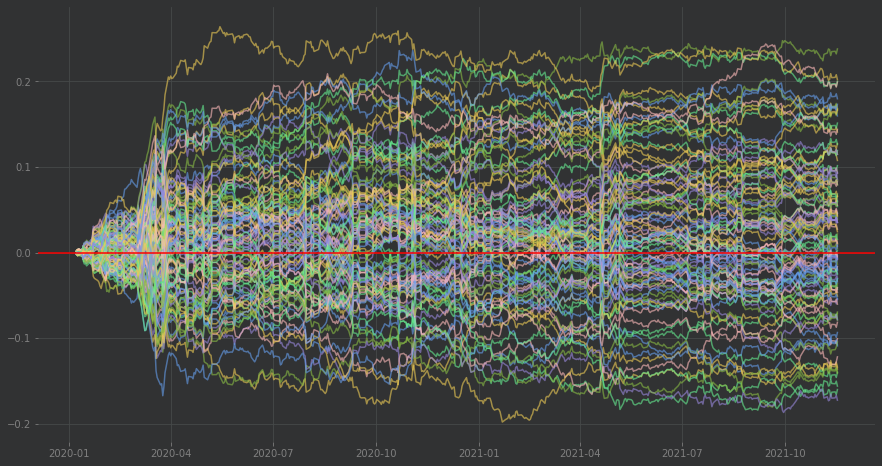

In [12]:
""" NO ES UNA SIMULACIÓN MONTE CARLO """

# Organize well all the data
ANN_returns = pd.DataFrame(returns_test, index=[f"ANN n°{i}" for i in range(len(returns_test))]).transpose()

# Adapt the size of the graph
plt.figure(figsize=(15,8))

# Plot the returns
plt.plot(ANN_returns.cumsum(axis=0), alpha=0.6)

# Plot break-even line
plt.axhline(0, color="red")

# show the graph
plt.show()

# Crear un criterio de decisión

In [14]:
def drawdown_function(serie):

  # We compute Cumsum of the returns
  cum = serie.dropna().cumsum() + 1

  # We compute max of the cumsum on the period (accumulate max) # (1,3,5,3,1) --> (1,3,5,5,5)
  running_max = np.maximum.accumulate(cum)

  # We compute drawdown
  drawdown = cum/running_max - 1
  return drawdown

In [15]:
# Create empty dataframe
values = pd.DataFrame(index=["ret/dd", "ret", "dd"])

# Compute return and max drawdawn for each ANN
for col in ANN_returns.columns:

  # Compute the returns and the max drawdown for one ANN
  ret, dd = ANN_returns[col].cumsum().iloc[-1], -np.min(drawdown_function(ANN_returns[col]))

  # Create a column containing the ret/dd ratio, the returns and the drawdown
  values[col] = ret/dd, ret, dd

In [16]:
values.transpose().sort_values(by="ret/dd", ascending=False)

,ret/dd,ret,dd
ANN n°40,5.823329,0.237882,0.040850
ANN n°79,5.095621,0.200092,0.039267
ANN n°36,3.845066,0.159667,0.041525
ANN n°77,3.541137,0.143873,0.040629
ANN n°81,3.357805,0.201992,0.060156
...,...,...,...
ANN n°94,-0.800646,-0.141077,0.176204
ANN n°97,-0.800825,-0.155999,0.194798
ANN n°88,-0.821976,-0.104511,0.127146
ANN n°55,-0.879455,-0.140073,0.159273


In [28]:
ANN_models = list(values.transpose().sort_values(by="ret/dd", ascending=False).index[0:9])

In [29]:
ANN_models

['ANN n°40',
 'ANN n°79',
 'ANN n°36',
 'ANN n°77',
 'ANN n°81',
 'ANN n°15',
 'ANN n°42',
 'ANN n°33',
 'ANN n°69']

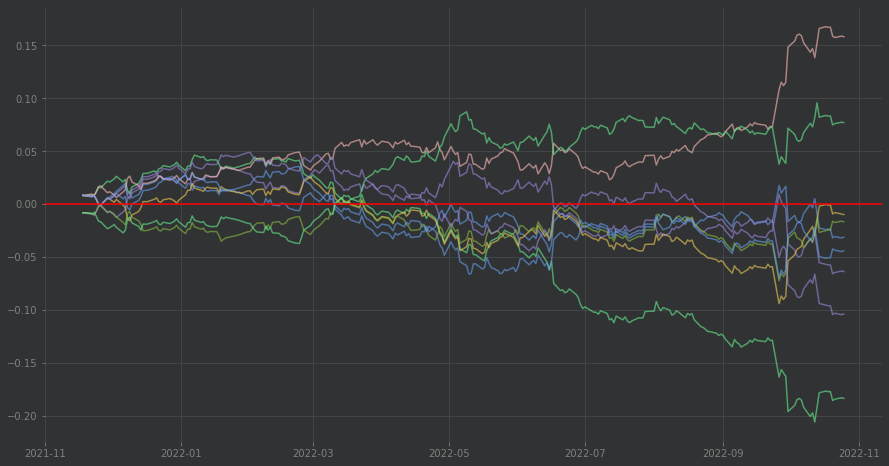

In [30]:
""" Use the 3best models on the test set to trade on the validation set"""

# Organize the data 
ANN_val = pd.DataFrame(returns_val, index=[f"ANN n°{i}" for i in range(len(returns_val))]).transpose()

# Adapt the size
plt.figure(figsize=(15,8))

# Plot the portfolio method containing the 10 best strategies
plt.plot(ANN_val[ANN_models].cumsum(axis=0), alpha=0.6)

plt.axhline(0, color="red")

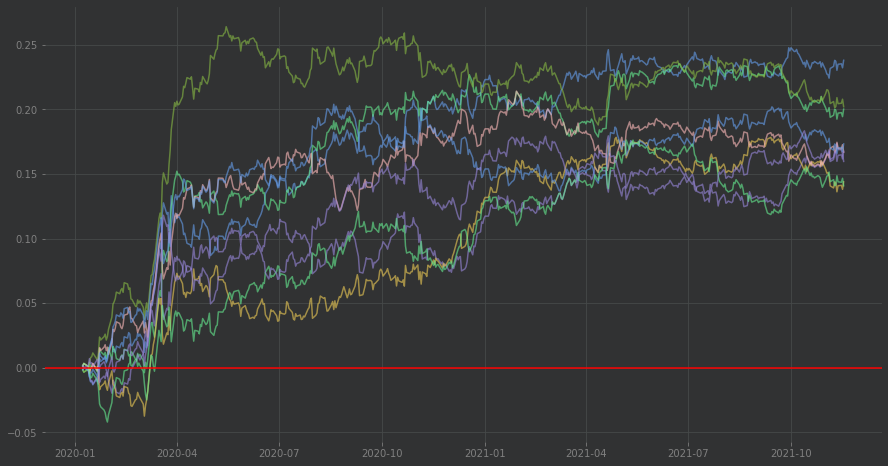

In [31]:
""" Use the 3best models on the test set to trade on the test set"""

# Organize the data 
ANN_val = pd.DataFrame(returns_val, index=[f"ANN n°{i}" for i in range(len(returns_val))]).transpose()

# Adapt the size
plt.figure(figsize=(15,8))

# Plot the portfolio method containing the 10 best strategies
plt.plot(ANN_returns[ANN_models].cumsum(axis=0), alpha=0.6)

plt.axhline(0, color="red")

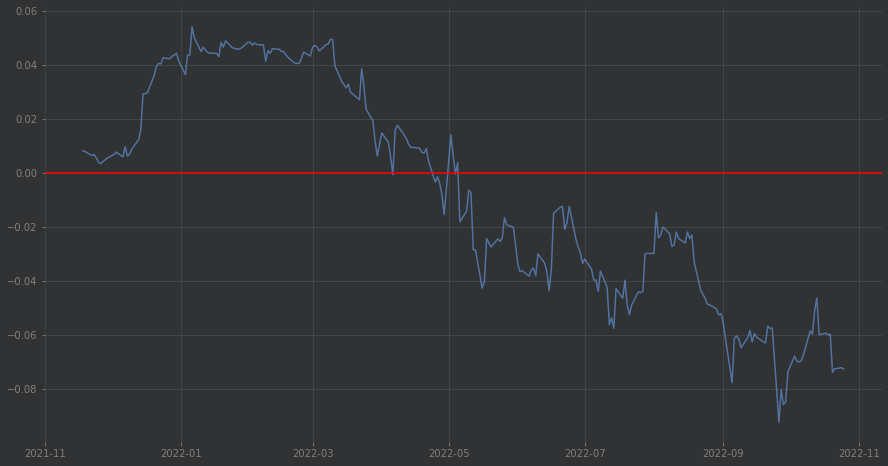

In [32]:
""" Strategy created """
# Adapt the size
plt.figure(figsize=(15,8))

# Plot the portfolio method containing the 10 best strategies
plt.plot(ANN_val[ANN_models].sum(axis=1).cumsum(axis=0)/3, alpha=0.6)
plt.axhline(0, color="red")

# Método de Bagging

In [22]:
def ANN_weights():
  nb_hidden_layer=2
  # INTIALIZATION SEQUENTIAL MODEL
  regressor = Sequential()

  # FIRST LAYER
  regressor.add(Dense(25, input_shape=(X_train_sc.shape[1],), activation="relu"))

  # ADD HIDDEN LAYER
  for i in range(1,nb_hidden_layer):
    regressor.add(Dense(int(25/i), activation="relu"))

  # OUTPUT LAYER DENSE
  regressor.add(Dense(1, activation="linear"))

  # COMPILE THE MODEL
  regressor.compile(loss="mse", optimizer="adam")

  return regressor

In [33]:
# Create empty dataframe
prediction = pd.DataFrame(index = dfc.index)
for nb in ANN_models:

  # Create ANN structure
  ann = ANN_weights()

  # Import trained weights
  ann.load_weights(f"Weights_ANN/{nb}")

  # Create predictions for the whole dataset
  pre = ann.predict(np.concatenate((X_train_sc,X_test_sc),
                                        axis=0))
  prediction[f"ANN n°{nb}"] = pre
prediction

152/152 [==============================] - 0s 1ms/step


152/152 [==============================] - 0s 1ms/step


152/152 [==============================] - 0s 1ms/step


152/152 [==============================] - 0s 1ms/step


,ANN n°ANN n°40,ANN n°ANN n°79,ANN n°ANN n°36,ANN n°ANN n°77,ANN n°ANN n°81,ANN n°ANN n°15,ANN n°ANN n°42,ANN n°ANN n°33,ANN n°ANN n°69
time,,,,,,,,,
2004-02-23,-0.003610,-0.002400,0.004813,-0.003641,-0.005988,-0.006592,0.003103,0.006739,0.003430
2004-02-24,-0.004793,-0.002680,0.001723,-0.001709,-0.004623,-0.004032,0.005280,0.007788,0.007915
2004-02-25,-0.003374,-0.004180,0.002600,-0.002805,-0.006998,-0.005395,0.002361,0.006678,0.011350
2004-02-26,-0.004747,-0.003073,0.003574,-0.002593,-0.004920,-0.005826,0.003108,0.007013,0.005023
2004-02-27,-0.004572,-0.003159,0.003641,-0.002658,-0.005578,-0.005847,0.003141,0.006895,0.005707
...,...,...,...,...,...,...,...,...,...
2022-10-19,-0.001126,-0.033522,-0.029556,-0.008588,0.009570,-0.000232,0.002011,-0.003845,-0.002747
2022-10-20,-0.001021,-0.033306,-0.030323,-0.009204,0.009177,0.000419,0.002101,-0.002659,-0.001783
2022-10-21,0.008388,-0.027437,-0.032778,0.002330,-0.003397,-0.002946,0.004257,-0.005211,0.007524


In [34]:
prediction["Increase"] = (np.sign(prediction)==1).sum(axis=1)
prediction["Decrease"] = (np.sign(prediction)==-1).sum(axis=1)
prediction

,ANN n°ANN n°40,ANN n°ANN n°79,ANN n°ANN n°36,ANN n°ANN n°77,ANN n°ANN n°81,ANN n°ANN n°15,ANN n°ANN n°42,ANN n°ANN n°33,ANN n°ANN n°69,Increase,Decrease
time,,,,,,,,,,,
2004-02-23,-0.003610,-0.002400,0.004813,-0.003641,-0.005988,-0.006592,0.003103,0.006739,0.003430,4,5
2004-02-24,-0.004793,-0.002680,0.001723,-0.001709,-0.004623,-0.004032,0.005280,0.007788,0.007915,4,5
2004-02-25,-0.003374,-0.004180,0.002600,-0.002805,-0.006998,-0.005395,0.002361,0.006678,0.011350,4,5
2004-02-26,-0.004747,-0.003073,0.003574,-0.002593,-0.004920,-0.005826,0.003108,0.007013,0.005023,4,5
2004-02-27,-0.004572,-0.003159,0.003641,-0.002658,-0.005578,-0.005847,0.003141,0.006895,0.005707,4,5
...,...,...,...,...,...,...,...,...,...,...,...
2022-10-19,-0.001126,-0.033522,-0.029556,-0.008588,0.009570,-0.000232,0.002011,-0.003845,-0.002747,2,7
2022-10-20,-0.001021,-0.033306,-0.030323,-0.009204,0.009177,0.000419,0.002101,-0.002659,-0.001783,3,6
2022-10-21,0.008388,-0.027437,-0.032778,0.002330,-0.003397,-0.002946,0.004257,-0.005211,0.007524,4,5


In [35]:
# Put the daily return of the asset
prediction["returns"] = dfc["returns"]

# Compute the position doing a bagging on the best ANN
prediction["position"] = np.nan
prediction.loc[prediction["Increase"] > prediction["Decrease"], "position"] = 1
prediction.loc[prediction["Increase"] < prediction["Decrease"], "position"] = -1


In [36]:
prediction

,ANN n°ANN n°40,ANN n°ANN n°79,ANN n°ANN n°36,ANN n°ANN n°77,ANN n°ANN n°81,ANN n°ANN n°15,ANN n°ANN n°42,ANN n°ANN n°33,ANN n°ANN n°69,Increase,Decrease,returns,position
time,,,,,,,,,,,,,
2004-02-23,-0.003610,-0.002400,0.004813,-0.003641,-0.005988,-0.006592,0.003103,0.006739,0.003430,4,5,-0.002240,-1.0
2004-02-24,-0.004793,-0.002680,0.001723,-0.001709,-0.004623,-0.004032,0.005280,0.007788,0.007915,4,5,-0.007036,-1.0
2004-02-25,-0.003374,-0.004180,0.002600,-0.002805,-0.006998,-0.005395,0.002361,0.006678,0.011350,4,5,0.004347,-1.0
2004-02-26,-0.004747,-0.003073,0.003574,-0.002593,-0.004920,-0.005826,0.003108,0.007013,0.005023,4,5,-0.001576,-1.0
2004-02-27,-0.004572,-0.003159,0.003641,-0.002658,-0.005578,-0.005847,0.003141,0.006895,0.005707,4,5,0.003458,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-19,-0.001126,-0.033522,-0.029556,-0.008588,0.009570,-0.000232,0.002011,-0.003845,-0.002747,2,7,-0.000093,-1.0
2022-10-20,-0.001021,-0.033306,-0.030323,-0.009204,0.009177,0.000419,0.002101,-0.002659,-0.001783,3,6,0.008440,-1.0
2022-10-21,0.008388,-0.027437,-0.032778,0.002330,-0.003397,-0.002946,0.004257,-0.005211,0.007524,4,5,-0.001266,-1.0


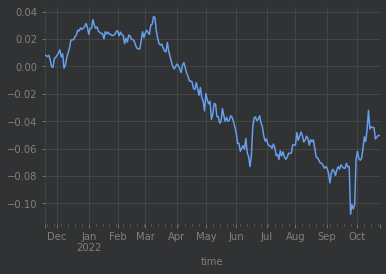

In [37]:
# When you will run again the code you can have different results
# Compute and plot the strategy return on the validation test
# Very important to put the shift at he position,Don't forget!
prediction["strategy"] = prediction["returns"] * prediction["position"].shift(1)
split, split_val = int(0.85*len(dfc)), int(0.95*len(dfc))
prediction["strategy"].iloc[split_val:].cumsum().plot()